# Unsupervised Learning: Trade&Ahead



## Importing necessary libraries and data

In [ ]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='darkgrid')

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist, pdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to perform PCA
from sklearn.decomposition import PCA

# to suppress warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
Train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Unsupervised/stock_data.csv')
df=Train.copy()

In [ ]:
df

Ticker Symbol                 Security             GICS Sector  \
0             AAL  American Airlines Group             Industrials   
1            ABBV                   AbbVie             Health Care   
2             ABT      Abbott Laboratories             Health Care   
3            ADBE        Adobe Systems Inc  Information Technology   
4             ADI     Analog Devices, Inc.  Information Technology   
..            ...                      ...                     ...   
335          YHOO               Yahoo Inc.  Information Technology   
336           YUM          Yum! Brands Inc  Consumer Discretionary   
337           ZBH   Zimmer Biomet Holdings             Health Care   
338          ZION            Zions Bancorp              Financials   
339           ZTS                   Zoetis             Health Care   

                GICS Sub Industry  Current Price  Price Change  Volatility  \
0                        Airlines      42.349998      9.999995    1.687151   
1                 Pharmaceuticals      59.240002      8.339433    2.197887   
2           Health Care Equipment      44.910000     11.301121    1.273646   
3            Application Software      93.940002     13.977195    1.357679   
4                  Semiconductors      55.320000     -1.827858    1.701169   
..                            ...            ...           ...         ...   
335  Internet Software & Services      33.259998     14.887727    1.845149   
336                   Restaurants      52.516175     -8.698917    1.478877   
337         Health Care Equipment     102.589996      9.347683    1.404206   
338                Regional Banks      27.299999     -1.158588    1.468176   
339               Pharmaceuticals      47.919998     16.678836    1.610285   

     ROE  Cash Ratio  Net Cash Flow  Net Income  Earnings Per Share  \
0    135          51     -604000000  7610000000               11.39   
1    130          77       51000000  5144000000                3.15   
2     21          67      938000000  4423000000                2.94   
3      9         180     -240840000   629551000                1.26   
4     14         272      315120000   696878000                0.31   
..   ...         ...            ...         ...                 ...   
335   15         459    -1032187000 -4359082000               -4.64   
336  142          27      159000000  1293000000                2.97   
337    1         100      376000000   147000000                0.78   
338    4          99      -43623000   309471000                1.20   
339   32          65      272000000   339000000                0.68   

     Estimated Shares Outstanding   P/E Ratio  P/B Ratio  
0                    6.681299e+08    3.718174  -8.784219  
1                    1.633016e+09   18.806350  -8.750068  
2                    1.504422e+09   15.275510  -0.394171  
3                    4.996437e+08   74.555557   4.199651  
4                    2.247994e+09  178.451613   1.059810  
..                            ...         ...        ...  
335                  9.394573e+08   28.976191   6.261775  
336                  4.353535e+08   17.682214  -3.838260  
337                  1.884615e+08  131.525636 -23.884449  
338                  2.578925e+08   22.749999  -0.063096  
339                  4.985294e+08   70.470585   1.723068  

[340 rows x 15 columns]

## Data Overview

###First and last 5 rows in dataset

In [ ]:
df.head()

Ticker Symbol                 Security             GICS Sector  \
0           AAL  American Airlines Group             Industrials   
1          ABBV                   AbbVie             Health Care   
2           ABT      Abbott Laboratories             Health Care   
3          ADBE        Adobe Systems Inc  Information Technology   
4           ADI     Analog Devices, Inc.  Information Technology   

       GICS Sub Industry  Current Price  Price Change  Volatility  ROE  \
0               Airlines      42.349998      9.999995    1.687151  135   
1        Pharmaceuticals      59.240002      8.339433    2.197887  130   
2  Health Care Equipment      44.910000     11.301121    1.273646   21   
3   Application Software      93.940002     13.977195    1.357679    9   
4         Semiconductors      55.320000     -1.827858    1.701169   14   

   Cash Ratio  Net Cash Flow  Net Income  Earnings Per Share  \
0          51     -604000000  7610000000               11.39   
1          77       51000000  5144000000                3.15   
2          67      938000000  4423000000                2.94   
3         180     -240840000   629551000                1.26   
4         272      315120000   696878000                0.31   

   Estimated Shares Outstanding   P/E Ratio  P/B Ratio  
0                  6.681299e+08    3.718174  -8.784219  
1                  1.633016e+09   18.806350  -8.750068  
2                  1.504422e+09   15.275510  -0.394171  
3                  4.996437e+08   74.555557   4.199651  
4                  2.247994e+09  178.451613   1.059810

In [ ]:
df.tail()

Ticker Symbol                Security             GICS Sector  \
335          YHOO              Yahoo Inc.  Information Technology   
336           YUM         Yum! Brands Inc  Consumer Discretionary   
337           ZBH  Zimmer Biomet Holdings             Health Care   
338          ZION           Zions Bancorp              Financials   
339           ZTS                  Zoetis             Health Care   

                GICS Sub Industry  Current Price  Price Change  Volatility  \
335  Internet Software & Services      33.259998     14.887727    1.845149   
336                   Restaurants      52.516175     -8.698917    1.478877   
337         Health Care Equipment     102.589996      9.347683    1.404206   
338                Regional Banks      27.299999     -1.158588    1.468176   
339               Pharmaceuticals      47.919998     16.678836    1.610285   

     ROE  Cash Ratio  Net Cash Flow  Net Income  Earnings Per Share  \
335   15         459    -1032187000 -4359082000               -4.64   
336  142          27      159000000  1293000000                2.97   
337    1         100      376000000   147000000                0.78   
338    4          99      -43623000   309471000                1.20   
339   32          65      272000000   339000000                0.68   

     Estimated Shares Outstanding   P/E Ratio  P/B Ratio  
335                   939457327.6   28.976191   6.261775  
336                   435353535.4   17.682214  -3.838260  
337                   188461538.5  131.525636 -23.884449  
338                   257892500.0   22.749999  -0.063096  
339                   498529411.8   70.470585   1.723068

###Checking shape of dataset

In [ ]:
df.shape

(340, 15)

There are 15 columns and 340 rows in dataset

###Checking data types of columns

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

The data types for Ticker Symbol, Security, GICS Sector, and GICS Sub Industry are object types, while the remaining variables are either of float or integer types. Additionally, the dataset does not contain any NULL values.

###Checking for duplicate values

In [ ]:
df.duplicated().sum()

0

There is no duplicate data.

###Checking for missing values



In [ ]:
# check for missing values in train data
df.isnull().sum()

Ticker Symbol                   0
Security                        0
GICS Sector                     0
GICS Sub Industry               0
Current Price                   0
Price Change                    0
Volatility                      0
ROE                             0
Cash Ratio                      0
Net Cash Flow                   0
Net Income                      0
Earnings Per Share              0
Estimated Shares Outstanding    0
P/E Ratio                       0
P/B Ratio                       0
dtype: int64

There are no missing values.

###Statistical summary of dataset

In [ ]:
# statistical summary of the numerical columns in data
df.describe(include='all').T

count unique  \
Ticker Symbol                   340    340   
Security                        340    340   
GICS Sector                     340     11   
GICS Sub Industry               340    104   
Current Price                 340.0    NaN   
Price Change                  340.0    NaN   
Volatility                    340.0    NaN   
ROE                           340.0    NaN   
Cash Ratio                    340.0    NaN   
Net Cash Flow                 340.0    NaN   
Net Income                    340.0    NaN   
Earnings Per Share            340.0    NaN   
Estimated Shares Outstanding  340.0    NaN   
P/E Ratio                     340.0    NaN   
P/B Ratio                     340.0    NaN   

                                                             top freq  \
Ticker Symbol                                                AAL    1   
Security                                 American Airlines Group    1   
GICS Sector                                          Industrials   53   
GICS Sub Industry             Oil & Gas Exploration & Production   16   
Current Price                                                NaN  NaN   
Price Change                                                 NaN  NaN   
Volatility                                                   NaN  NaN   
ROE                                                          NaN  NaN   
Cash Ratio                                                   NaN  NaN   
Net Cash Flow                                                NaN  NaN   
Net Income                                                   NaN  NaN   
Earnings Per Share                                           NaN  NaN   
Estimated Shares Outstanding                                 NaN  NaN   
P/E Ratio                                                    NaN  NaN   
P/B Ratio                                                    NaN  NaN   

                                           mean                std  \
Ticker Symbol                               NaN                NaN   
Security                                    NaN                NaN   
GICS Sector                                 NaN                NaN   
GICS Sub Industry                           NaN                NaN   
Current Price                         80.862345          98.055086   
Price Change                           4.078194          12.006338   
Volatility                             1.525976           0.591798   
ROE                                   39.597059          96.547538   
Cash Ratio                            70.023529          90.421331   
Net Cash Flow                   55537620.588235  1946365312.175789   
Net Income                    1494384602.941176  3940150279.327936   
Earnings Per Share                     2.776662           6.587779   
Estimated Shares Outstanding    577028337.75403   845849595.417695   
P/E Ratio                             32.612563          44.348731   
P/B Ratio                             -1.718249          13.966912   

                                        min          25%          50%  \
Ticker Symbol                           NaN          NaN          NaN   
Security                                NaN          NaN          NaN   
GICS Sector                             NaN          NaN          NaN   
GICS Sub Industry                       NaN          NaN          NaN   
Current Price                           4.5       38.555       59.705   
Price Change                     -47.129693    -0.939484     4.819505   
Volatility                         0.733163     1.134878     1.385593   
ROE                                     1.0         9.75         15.0   
Cash Ratio                              0.0         18.0         47.0   
Net Cash Flow                -11208000000.0 -193906500.0    2098000.0   
Net Income                   -23528000000.0  352301250.0  707336000.0   
Earnings Per Share                    -61.2       1.5575        2.895   
Estimated Shares Outstanding    27672156.86  158848216

Here are the key insights from the statistical summary:

1. **Current Price:**
   - Ranges from 4.5 to 1274.95 with a median of $59.71.

   - High volatility observed, indicated by a standard deviation of $98.06.

2. **Price Change:**
   - Exhibits variability, ranging from -47.13% to 55.05%.
   - Mean price change is positive at 4.08%.

3. **Volatility:**
   - Standard deviation of 0.59 suggests relatively stable stock prices.
   - Majority of stocks have volatility between 1.13 and 1.70.

4. **Return on Equity (ROE):**
   - Shows a wide range from 1.0 to 917.0.
   - Mean ROE is 39.60%, indicating profitability.

5. **Cash Ratio:**
   - Ranges from 0.0 to 958.0, with a mean of 70.02.
   - Highlights liquidity levels for the considered stocks.

6. **Net Cash Flow:**
   - Large variability, with a mean net cash flow of $55.54 million.
   - Some stocks exhibit significant positive cash flow.

7. **Net Income:**
   - Varied net income, ranging from -23.53 billion to 24.44 billion.
   - Mean net income is $1.49 billion.

8. **Earnings Per Share (EPS):**
   - EPS varies widely, with a mean of 2.78.
   - Some stocks have negative EPS, indicating losses.

9. **Estimated Shares Outstanding:**
   - Mean estimated shares outstanding is approximately 577 million.
   - Wide range from 27.67 million to over 6.15 billion.

10. **Price/Earnings (P/E) Ratio:**
    - P/E ratio varies from 2.94 to 528.04, with a mean of 32.61.
    - Indicates variations in market sentiment and valuation.

11. **Price/Book (P/B) Ratio:**
    - P/B ratio has a broad range from -76.12 to 129.06.
    - Some stocks have negative P/B ratios, possibly undervalued.

12. The most frequent GICS sector is Industrials, accounting for 53 instances, while the top GICS sub-industry is Oil & Gas Exploration & Production, appearing 16 times among the stocks.

These insights provide a snapshot of the key financial characteristics of the considered stocks, aiding in potential investment decisions.

## Exploratory Data Analysis (EDA)


In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(df, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=df, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        df[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        df[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(df, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(df[feature])  # length of the column
    count = df[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=df,
        x=feature,
        palette="Paired",
        order=df[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

### Univariate analysis

####Current Price

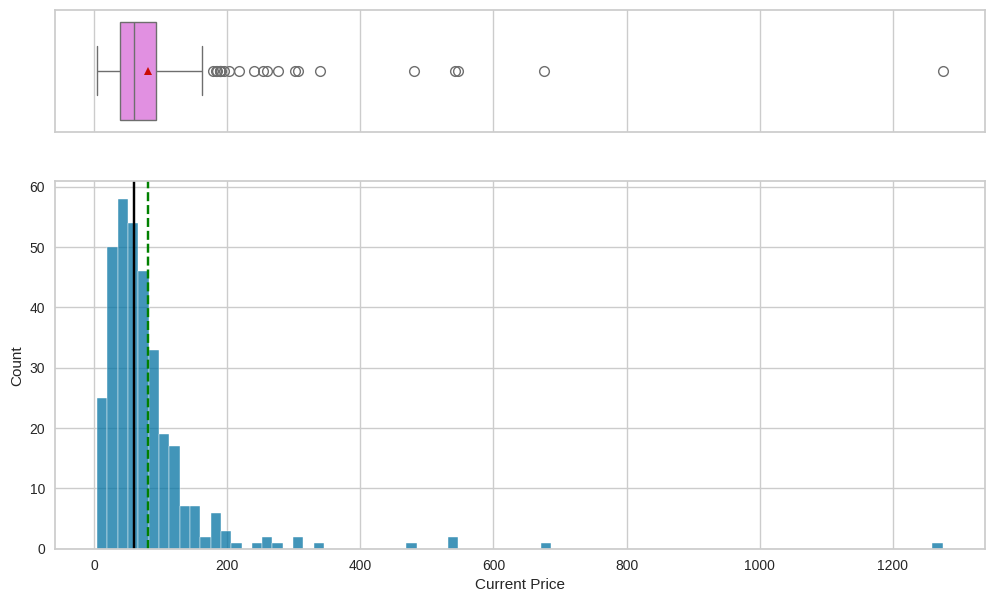

In [ ]:
histogram_boxplot(df, 'Current Price')

The current price distribution exhibits a right-skewed pattern, with a notable elongated right tail. The average current price is around $80.

####Price Change

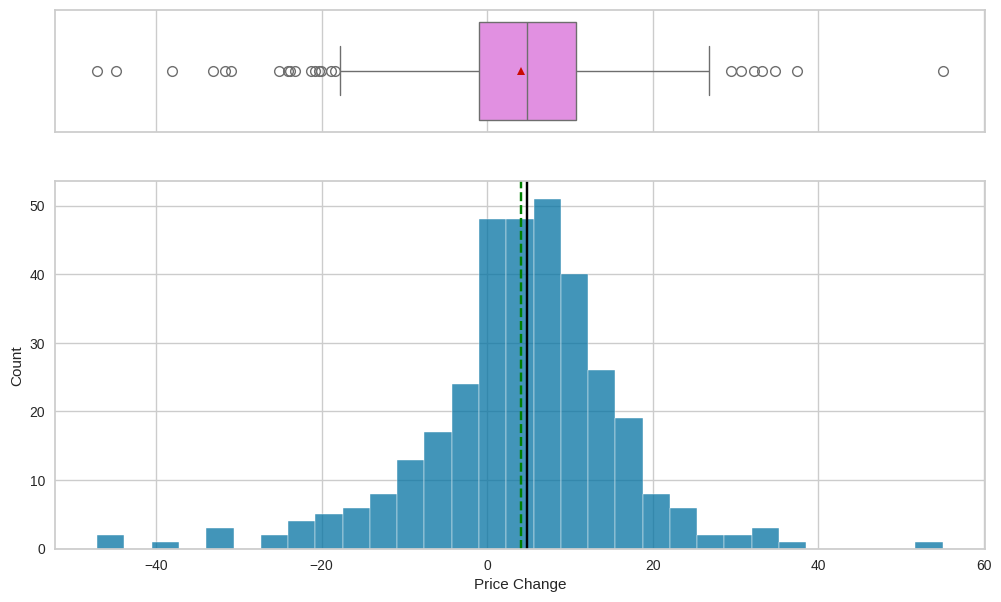

In [ ]:
histogram_boxplot(df,'Price Change')

The distribution of price changes closely resembles a normal distribution. Additionally, the mean and median values for price change are in close proximity to each other.

####Volatility

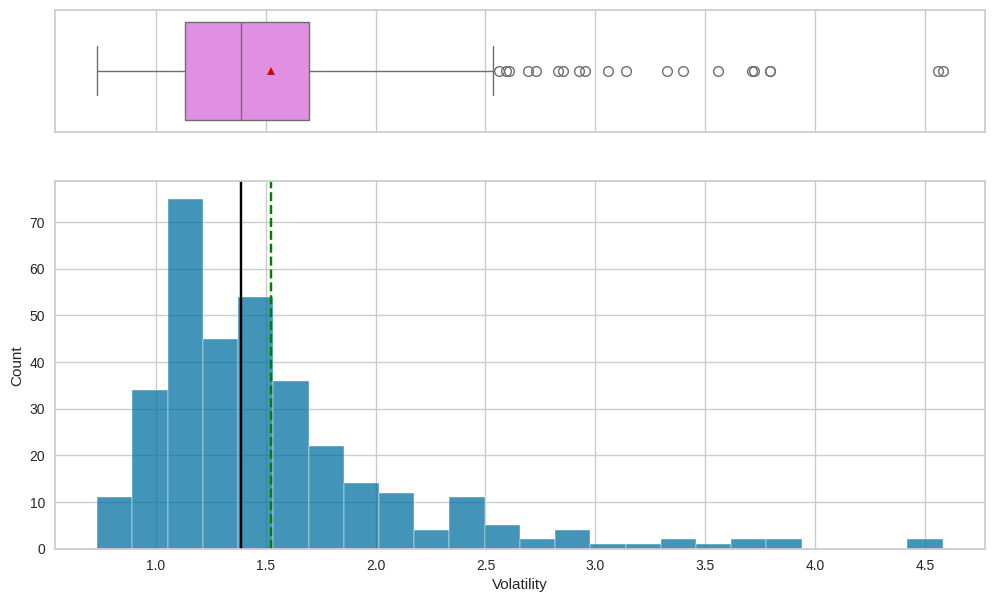

In [ ]:
histogram_boxplot(df,'Volatility')

The distribution of volatility is right-skewed with an elongated right tail.

####ROE

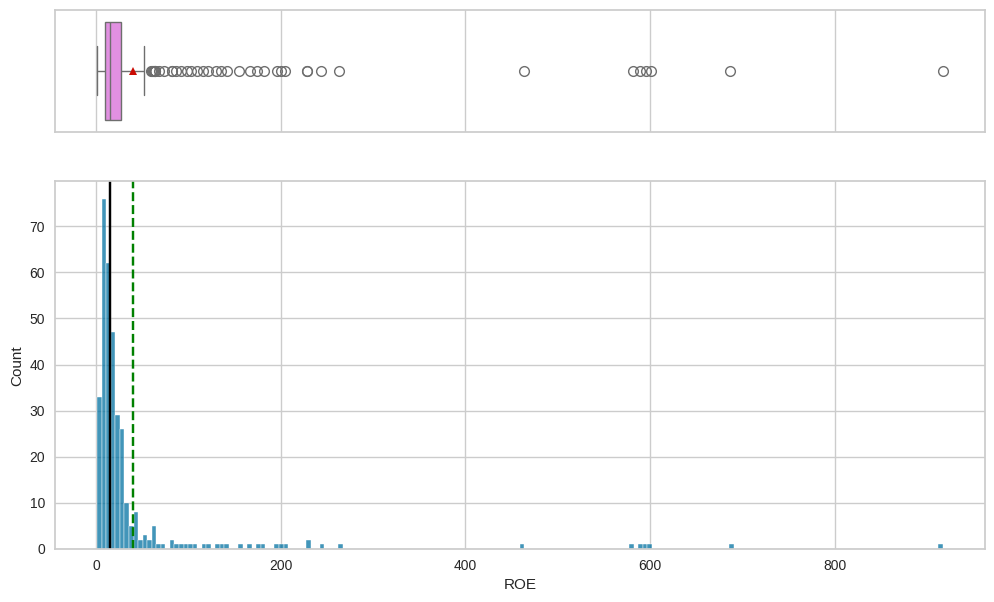

In [ ]:
histogram_boxplot(df,'ROE')


The distribution of Return on Equity (ROE) is strongly right-skewed, and the majority of stocks exhibit ROE values below 100.

####Cash Ratio

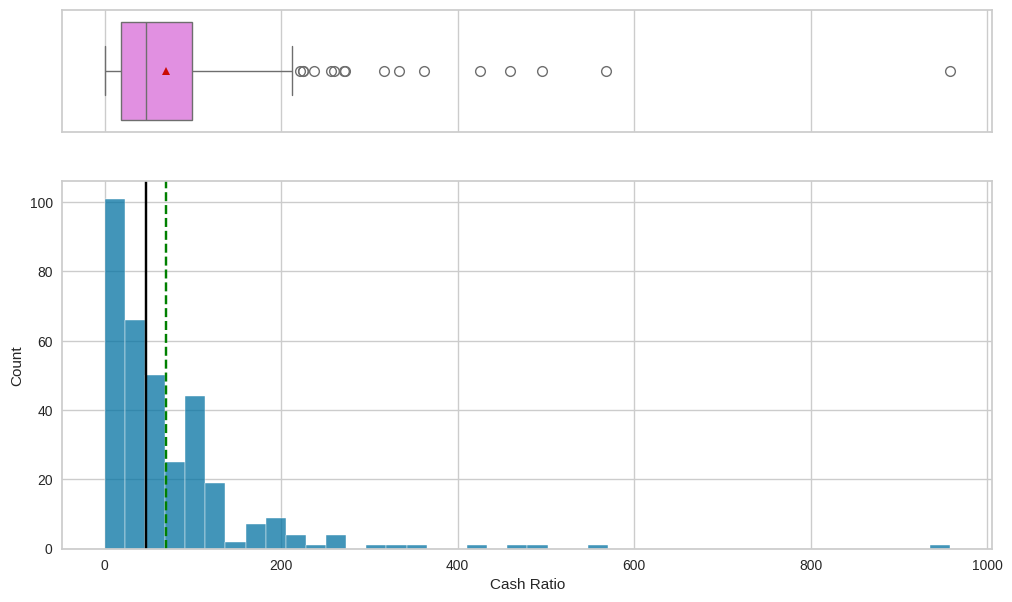

In [ ]:
histogram_boxplot(df,'Cash Ratio')


The distribution of cash ratios is right-skewed, with a mean cash ratio of approximately 70. The distribution has a very long tail to the right, extending up to 900.

####Net Cash Flow

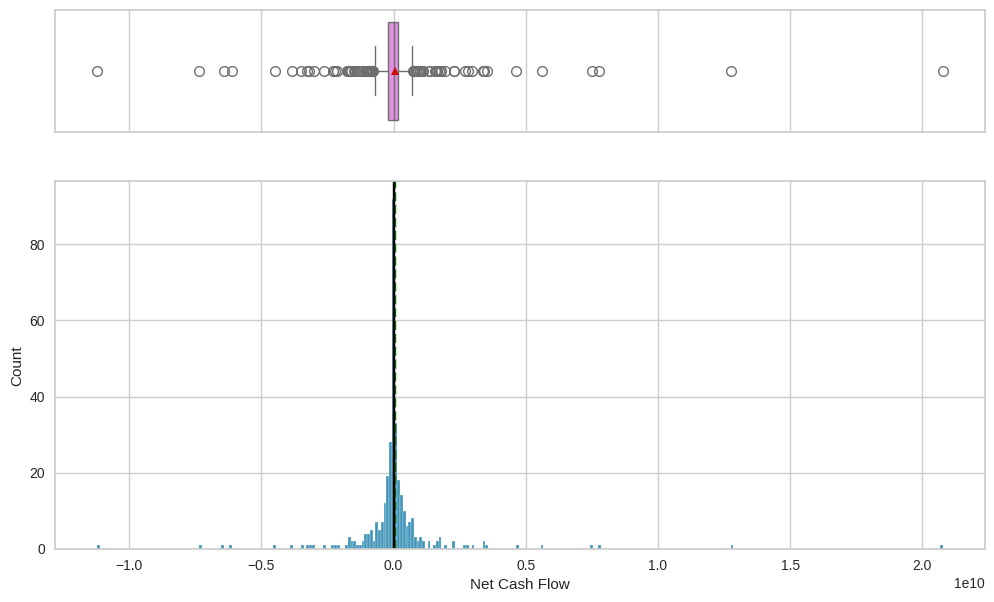

In [ ]:
histogram_boxplot(df,'Net Cash Flow')

The majority of values in the net cash flow distribution are concentrated within the range of approximately -193.91 million to 169.81 million.

####Net Income

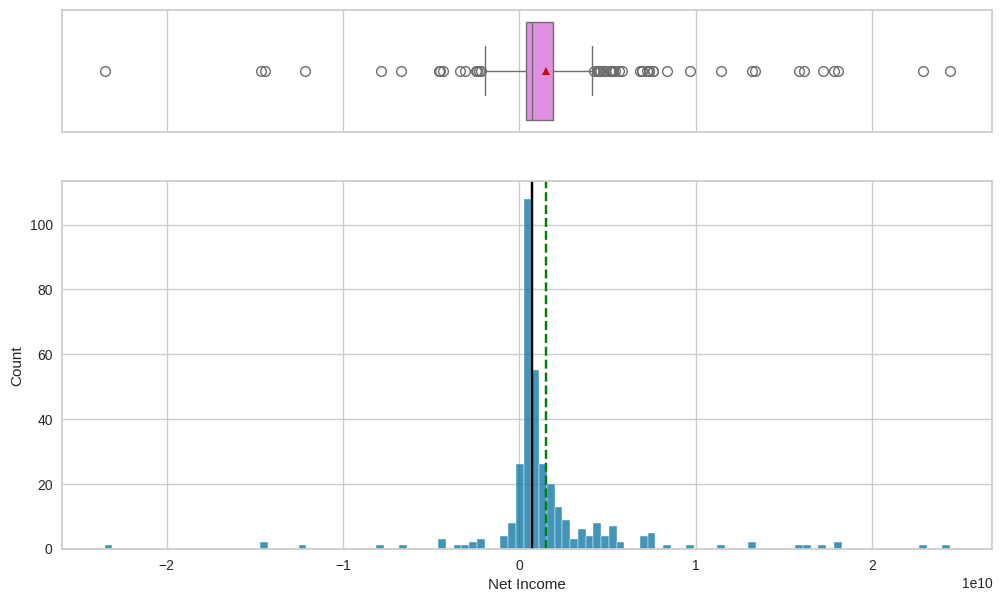

In [ ]:
histogram_boxplot(df,'Net Income')

The distribution of net income appears to follow a normal pattern, but there are outliers present. The values at the 25th and 75th percentiles are 352.30 million and 1.90 billion, respectively.

####Earnings Per Share

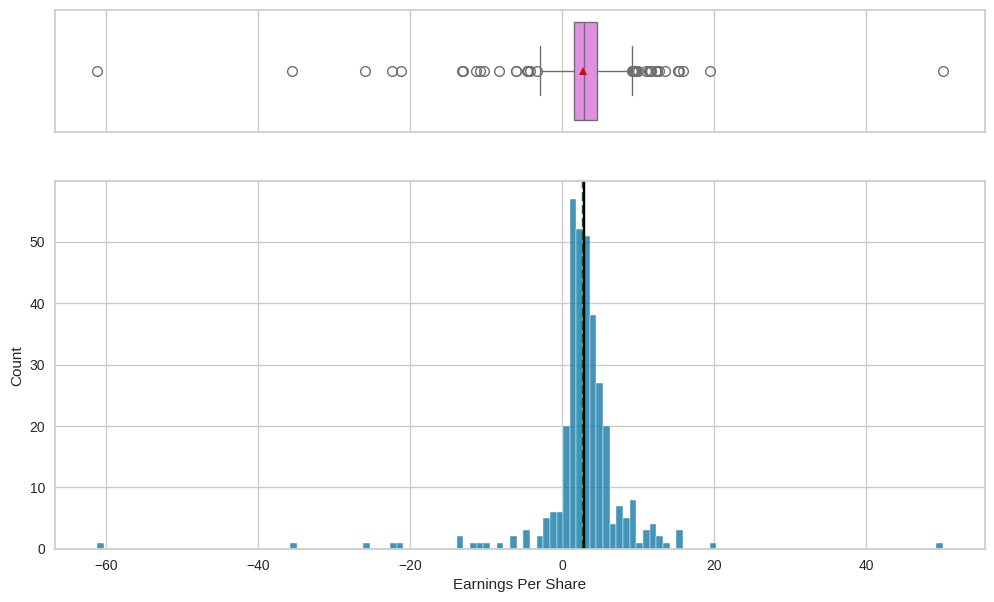

In [ ]:
histogram_boxplot(df,'Earnings Per Share')


The distribution of earnings per share is nearly normal, but there are more outliers on the lower end.

####Estimated Shares Outstanding

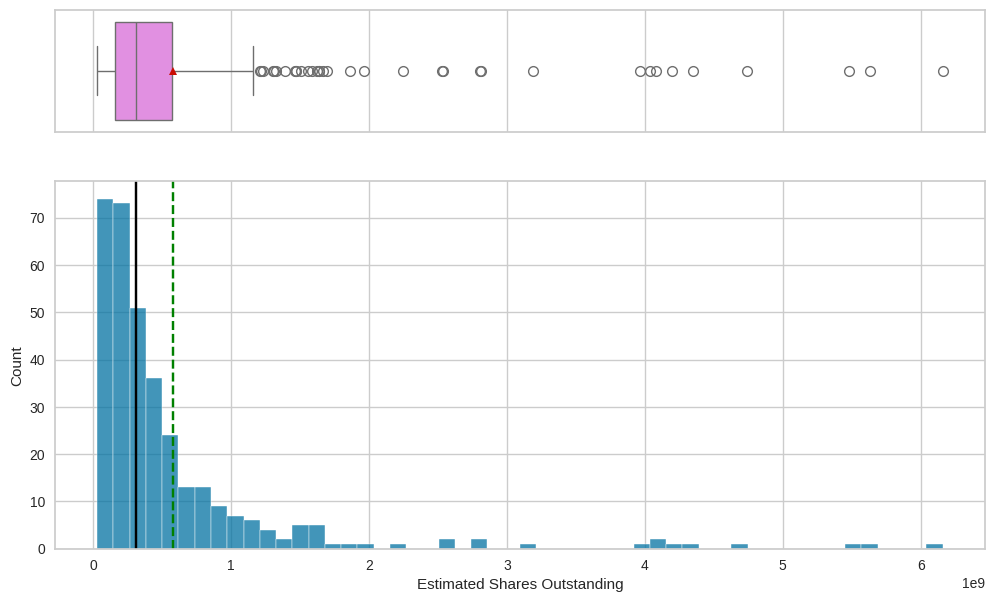

In [ ]:
histogram_boxplot(df,'Estimated Shares Outstanding')

The distribution of estimated shares outstanding is right-skewed, indicating that some companies have a substantial number of shares, reaching into the billions.

####P/E Ratio

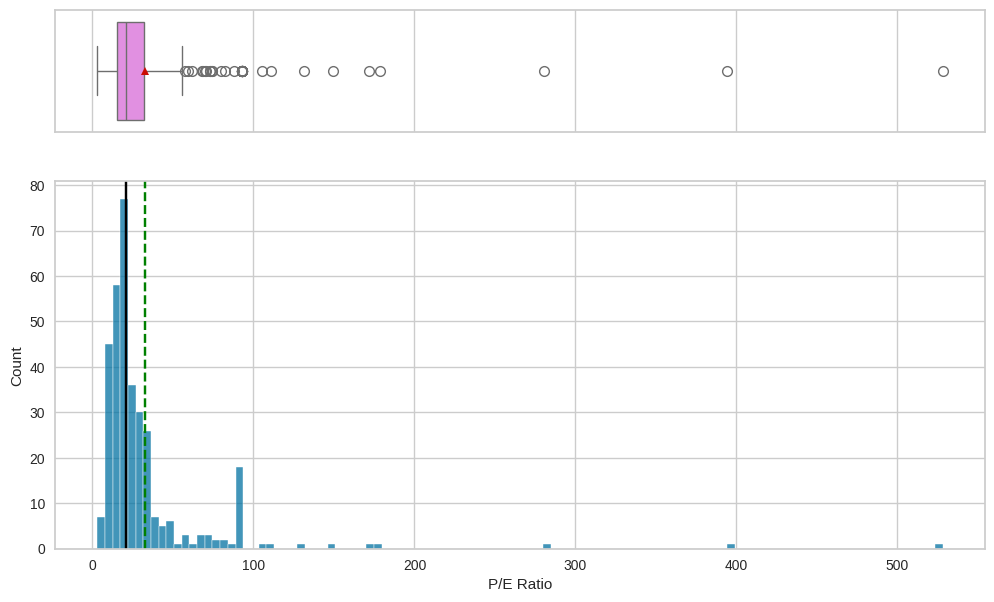

In [ ]:
histogram_boxplot(df,'P/E Ratio')


The distribution of P/E ratios is right-skewed, with a mean value of approximately 30 and a median around 20.

####P/B Ratio

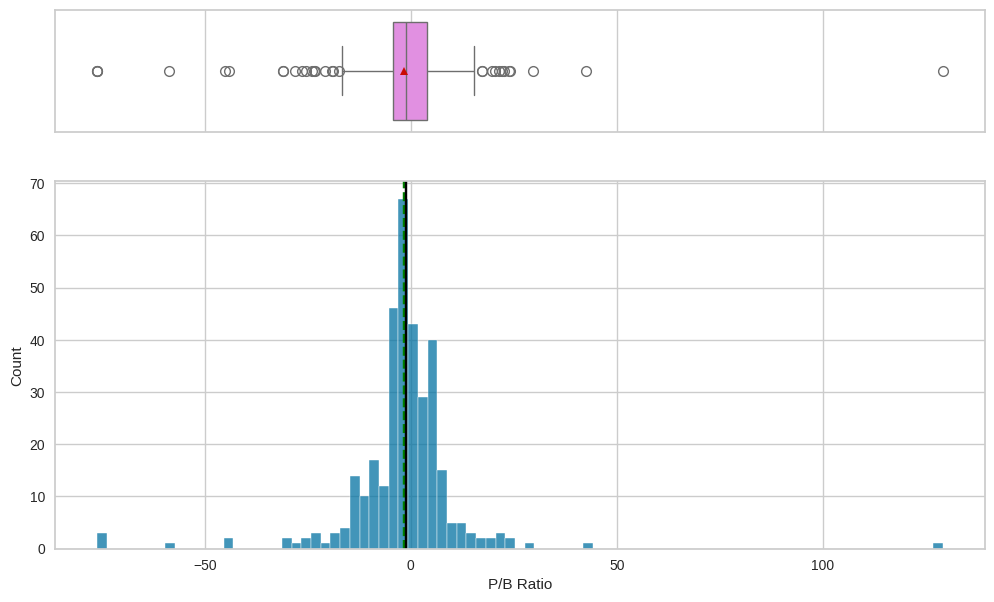

In [ ]:
histogram_boxplot(df,'P/B Ratio')

The distribution of P/B ratios exhibits a somewhat normal pattern, featuring both lower and upper outliers.

####GICS Sector

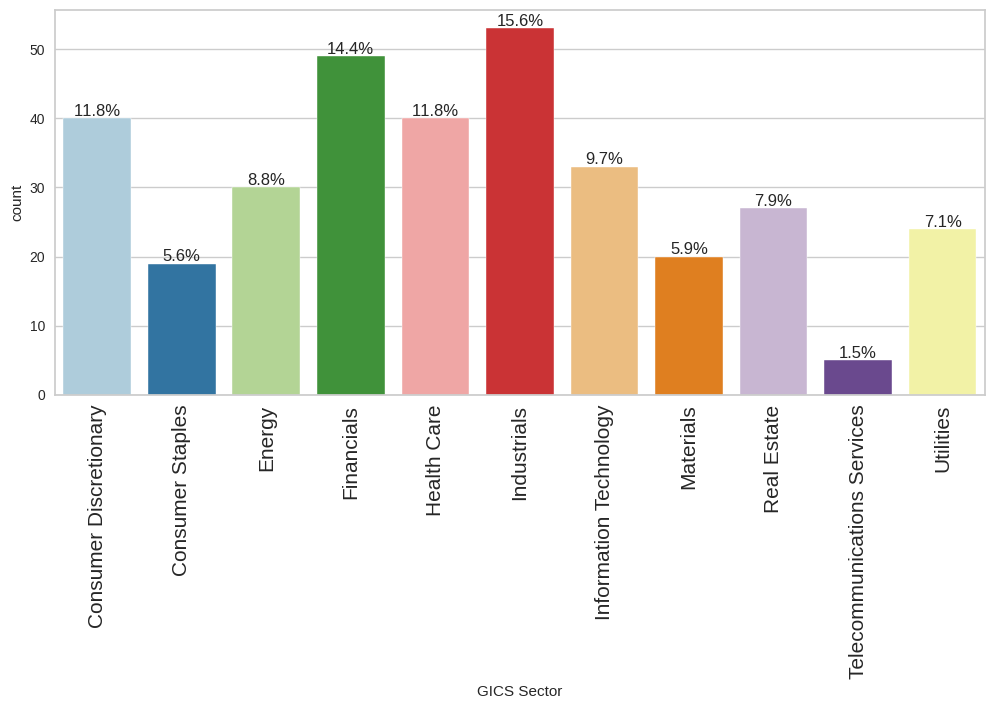

In [ ]:
labeled_barplot(df, 'GICS Sector', perc=True)

In [ ]:
#display the five sectors with the most number of stocks
df["GICS Sector"].value_counts().head(n=5)

Industrials               53
Financials                49
Health Care               40
Consumer Discretionary    40
Information Technology    33
Name: GICS Sector, dtype: int64


Stocks are sourced from 11 distinct industrial sectors, ensuring no single sector dominates more than 16% of the dataset. Notably, the leading four sectors—industrials, financials, consumer discretionary, and health care—collectively represent over half of the total number of stocks.

####GICS Sub Industry

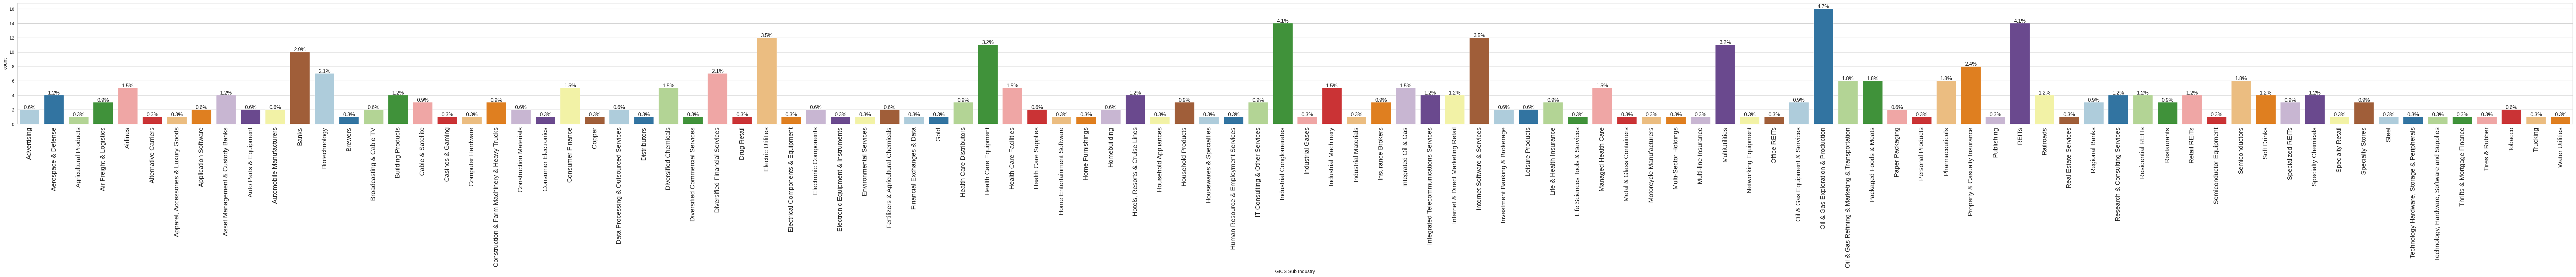

In [ ]:
labeled_barplot(df, 'GICS Sub Industry', perc=True)

In [ ]:
#display the five sub industries with the most number of stocks
df['GICS Sub Industry'].value_counts().head(n=5)

Oil & Gas Exploration & Production    16
REITs                                 14
Industrial Conglomerates              14
Electric Utilities                    12
Internet Software & Services          12
Name: GICS Sub Industry, dtype: int64

In [ ]:
sub_category_counts = df['GICS Sub Industry'].value_counts()
sub_category_counts.value_counts()

1     42
2     15
3     13
4     12
5      7
6      4
14     2
12     2
11     2
7      2
16     1
10     1
8      1
Name: GICS Sub Industry, dtype: int64

The dataset encompasses stocks from 104 distinct subindustries, ensuring no single subindustry holds more than 16 stocks. These results underscore the extensive diversification of the 340 stocks in the dataset across various sectors and subindustries. Moreover, among the subcategories, 89 have fewer than 5 stocks, with a significant subset of 42 subcategories containing only 1 stock each.







###Bivariate Analysis

####Correlation between Financial Indicators

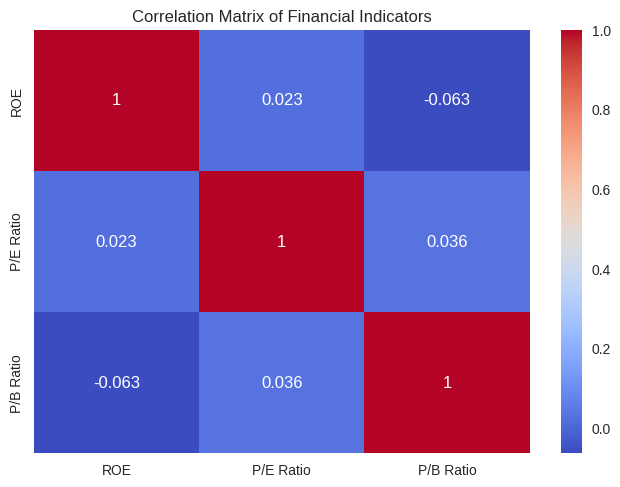

In [ ]:

financial_indicators = df[['ROE', 'P/E Ratio', 'P/B Ratio']]
correlation_matrix = financial_indicators.corr()

# Display correlation matrix as a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Financial Indicators')
plt.show()

In [ ]:
correlation_matrix

Current Price  Price Change  Volatility  \
Current Price                      1.000000      0.134982   -0.124257   
Price Change                       0.134982      1.000000   -0.408281   
Volatility                        -0.124257     -0.408281    1.000000   
ROE                               -0.000549     -0.043310    0.162532   
Cash Ratio                         0.127816      0.168586    0.020605   
Net Cash Flow                     -0.021961      0.026746   -0.014172   
Net Income                         0.036625      0.179298   -0.383433   
Earnings Per Share                 0.479604      0.175401   -0.379309   
Estimated Shares Outstanding      -0.145306      0.033656   -0.095704   
P/E Ratio                          0.260273     -0.002491    0.263600   
P/B Ratio                          0.124634      0.034329    0.046528   

                                   ROE  Cash Ratio  Net Cash Flow  Net Income  \
Current Price                -0.000549    0.127816      -0.021961    0.036625   
Price Change                 -0.043310    0.168586       0.026746    0.179298   
Volatility                    0.162532    0.020605      -0.014172   -0.383433   
ROE                           1.000000   -0.069122      -0.052205   -0.288524   
Cash Ratio                   -0.069122    1.000000       0.113819    0.028589   
Net Cash Flow                -0.052205    0.113819       1.000000    0.044229   
Net Income                   -0.288524    0.028589       0.044229    1.000000   
Earnings Per Share           -0.405291    0.024759       0.019348    0.557752   
Estimated Shares Outstanding -0.030288    0.135869      -0.051392    0.589310   
P/E Ratio                     0.023341    0.089483       0.026876   -0.224022   
P/B Ratio                    -0.063218    0.229672       0.057039   -0.061544   

                              Earnings Per Share  \
Current Price                           0.479604   
Price Change                            0.175401   
Volatility                             -0.379309   
ROE                                    -0.405291   
Cash Ratio                              0.024759   
Net Cash Flow                           0.019348   
Net Income                              0.557752   
Earnings Per Share                      1.000000   
Estimated Shares Outstanding           -0.026906   
P/E Ratio                              -0.260660   
P/B Ratio                               0.014915   

                              Estimated Shares Outstanding  P/E Ratio  \
Current Price                                    -0.145306   0.260273   
Price Change                                      0.033656  -0.002491   
Volatility                                       -0.095704   0.263600   
ROE                                              -0.030288   0.023341   
Cash Ratio                                        0.135869   0.089483   
Net Cash Flow                                    -0.051392   0.026876   
Net Income                                        0.589310  -0.224022   
Earnings Per Share                               -0.026906  -0.260660   
Estimated Shares Outstanding                      1.000000  -0.014551   
P/E Ratio                                        -0.014551   1.000000   
P/B Ratio                                        -0.028155   0.036422   

                              P/B Ratio  
Current Price                  0.124634  
Price Change                   0.034329  
Volatility                     0.046528  
ROE                           -0.063218  
Cash Ratio                     0.229672  
Net Cash Flow                  0.057039  
Net Income                    -0.061544  
Earnings Per Share             0.014915  
Estimated Shares Outstanding  -0.028155  
P/E Ratio                      0.036422  
P/B Ratio                      1.000000


The correlation matrix reveals relationships between various financial metrics. Notable associations include a positive correlation between Earnings Per Share (EPS) and Current Price (0.48), a negative correlation between Price Change and Volatility (-0.41), and a strong positive correlation between Net Income and Earnings Per Share (0.56). Additionally, there is a moderate positive correlation between Price/Earnings (P/E) ratio and both Current Price (0.26) and Volatility (0.26). Overall, these correlations provide insights into the interplay between different financial indicators.

####Stock Price vs. Financial Metrics

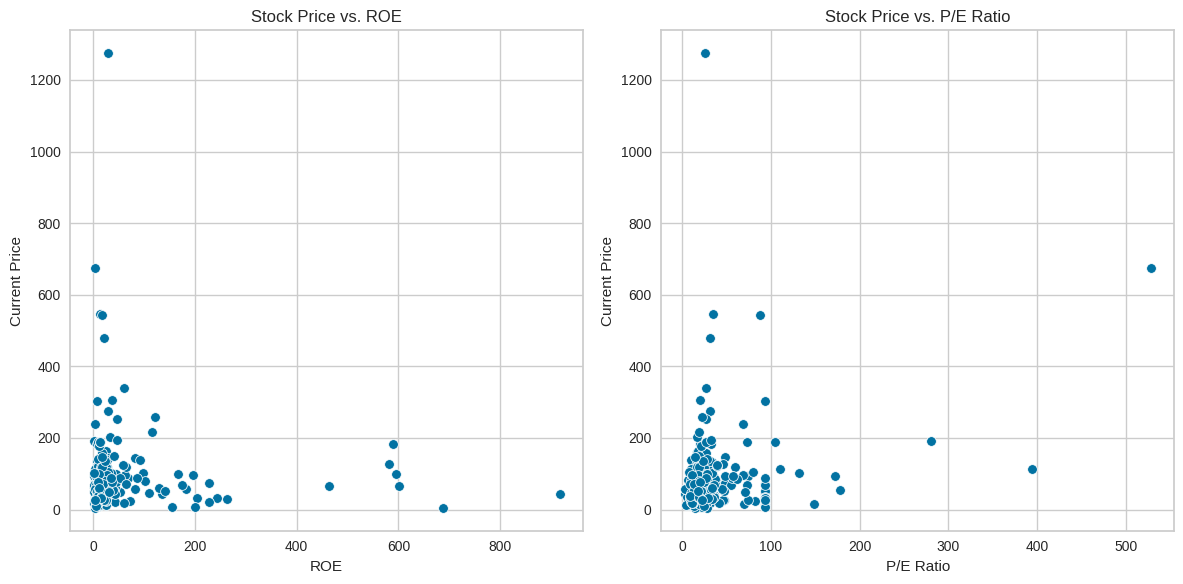

In [ ]:
plt.figure(figsize=(12, 6))

# Scatter plot for stock price vs. a financial metric (e.g., ROE)
plt.subplot(1, 2, 1)
sns.scatterplot(x='ROE', y='Current Price', data=df)
plt.title('Stock Price vs. ROE')

# Scatter plot for stock price vs. another financial metric (e.g., P/E Ratio)
plt.subplot(1, 2, 2)
sns.scatterplot(x='P/E Ratio', y='Current Price', data=df)
plt.title('Stock Price vs. P/E Ratio')

plt.tight_layout()
plt.show()


The current price distribution is concentrated in the range of 0 to 200 concerning both ROE and P/E ratio, indicating that most companies within the dataset have current prices and financial ratios falling within these respective intervals.

####Sector-wise Analysis

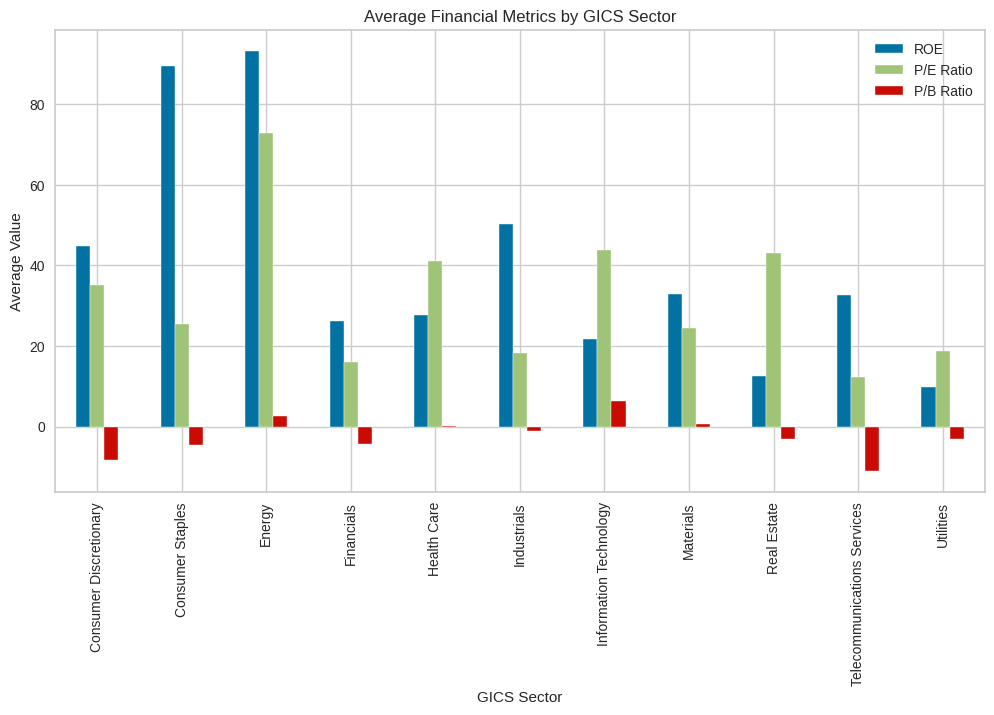

In [ ]:

average_metrics_by_sector = df.groupby('GICS Sector').mean()

# Display bar plots for average metrics by sector
average_metrics_by_sector[['ROE', 'P/E Ratio', 'P/B Ratio']].plot(kind='bar', figsize=(12, 6))
plt.title('Average Financial Metrics by GICS Sector')
plt.xlabel('GICS Sector')
plt.ylabel('Average Value')
plt.show()



This bar plot illustrates the average financial metrics by GICS sector. The Information Technology sector tends to have higher positive P/B ratios, while Telecommunications Services exhibit the largest negative average value. Energy and Consumer Staples sectors showcase higher average ROE, with Utilities having the least ROE. In terms of P/E ratio, Energy shows a higher average, while Telecommunications Services have the least. This analysis provides a sector-wise perspective on key financial metrics.

#### Volatility vs. Sector

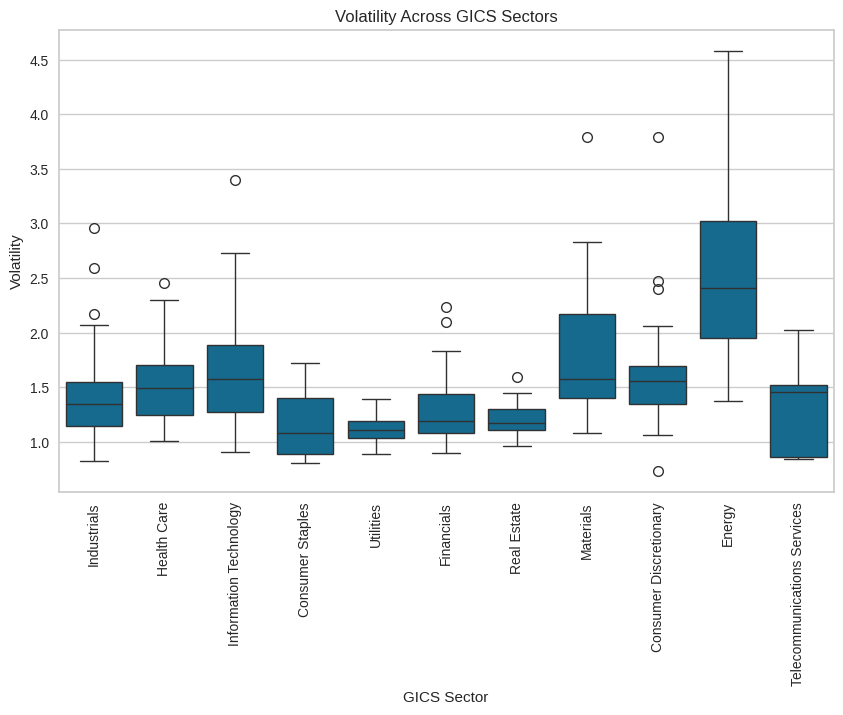

In [ ]:

plt.figure(figsize=(10, 6))
sns.boxplot(x='GICS Sector', y='Volatility', data=df)
plt.title('Volatility Across GICS Sectors')
plt.xlabel('GICS Sector')
plt.ylabel('Volatility')
plt.xticks(rotation=90)
plt.show()

The volatility of stock prices varies across GICS Sectors, with the Energy sector exhibiting the highest average volatility (1.722) and Telecommunications Services the lowest (1.060). The range of volatility is notable, for instance, in the Energy sector where it spans from 0.487 to 2.881. Overall, this analysis provides insights into the diverse risk levels present in different industry sectors.

####Earnings Per Share vs. Net Income

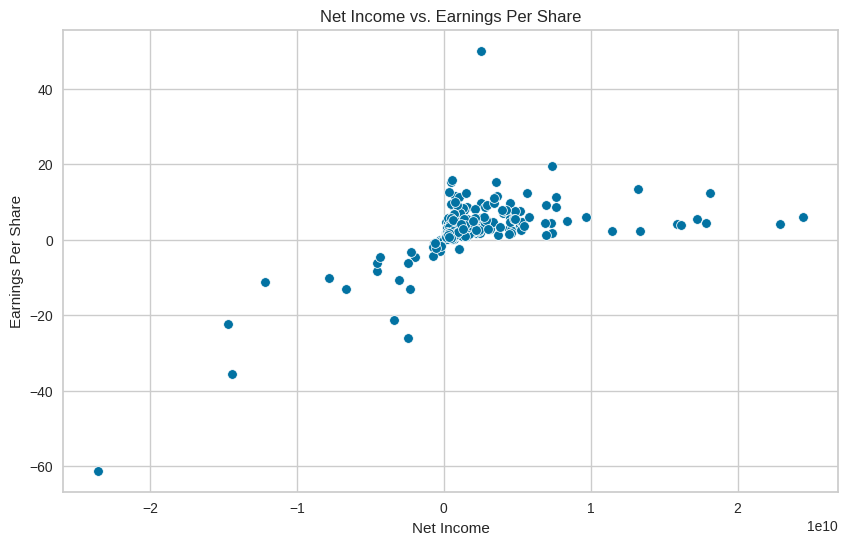

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Net Income', y='Earnings Per Share', data=df)
plt.title('Net Income vs. Earnings Per Share')
plt.xlabel('Net Income')
plt.ylabel('Earnings Per Share')
plt.show()

The distribution of earnings per share (EPS) is primarily concentrated in the range of 0 to 20, while net income spans from 0 to 1e10 (10 billion). This indicates that the majority of companies in the dataset have EPS values within the lower to moderate range, and net income varies widely but is generally capped at a substantial figure, possibly reflecting the presence of both smaller and larger enterprises in the dataset.


#### P/B Ratio vs. Net Cash Flow

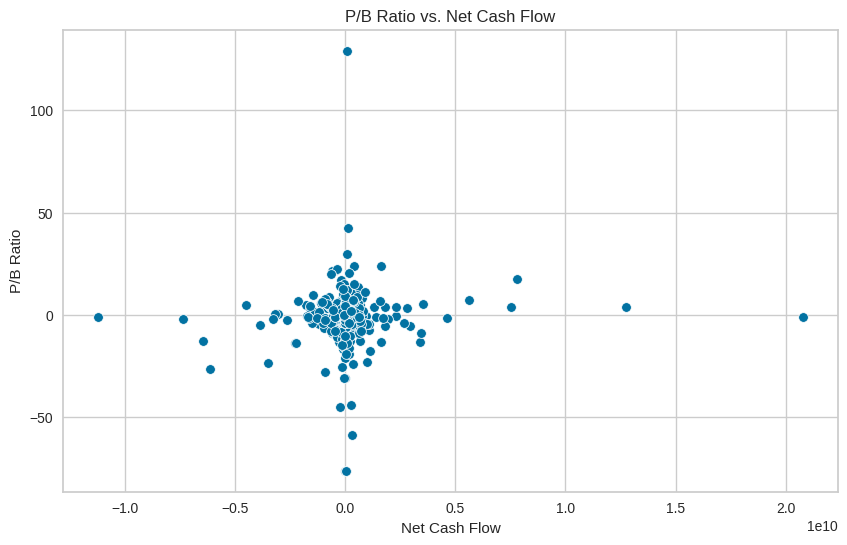

In [ ]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Net Cash Flow', y='P/B Ratio', data=df)
plt.title('P/B Ratio vs. Net Cash Flow')
plt.xlabel('Net Cash Flow')
plt.ylabel('P/B Ratio')
plt.show()


The distribution of values for both P/B ratio and net cash flow is heavily concentrated around zero. This suggests that the combination with near-zero net cash flow may raise concerns about financial health and liquidity.

#### Net Income vs. Sector

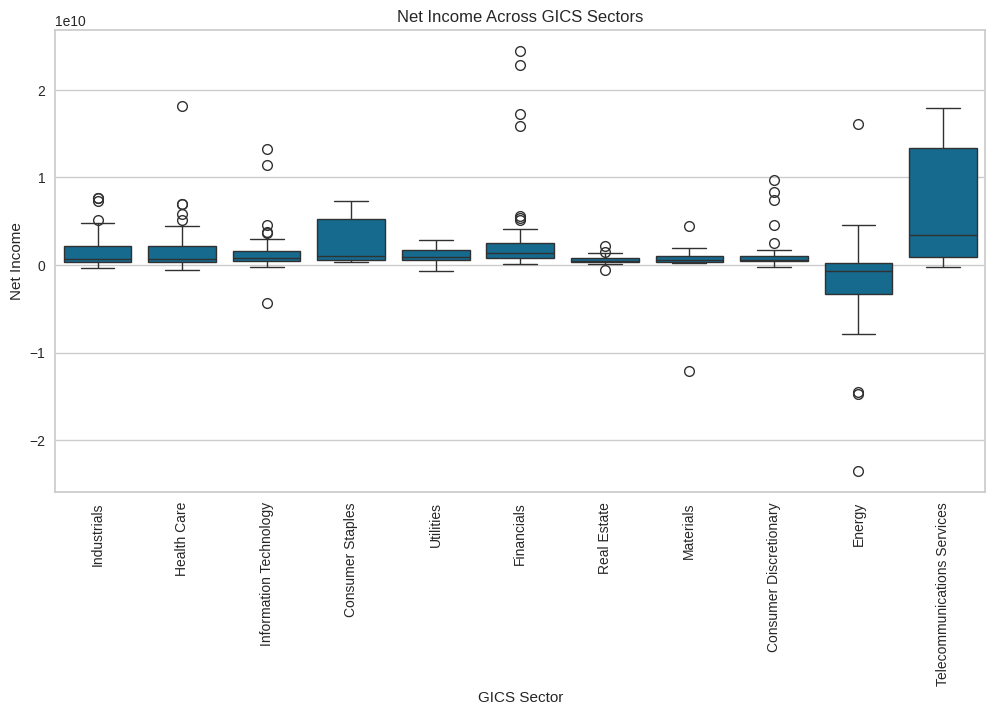

In [ ]:

plt.figure(figsize=(12, 6))
sns.boxplot(x='GICS Sector', y='Net Income', data=df)
plt.title('Net Income Across GICS Sectors')
plt.xlabel('GICS Sector')
plt.ylabel('Net Income')
plt.xticks(rotation=90)
plt.show()

In [ ]:
df.groupby('GICS Sector')['Net Income'].agg(['mean', 'min', 'max']).sort_values(by='mean')

mean          min          max
GICS Sector                                                        
Energy                      -2.087527e+09 -23528000000  16150000000
Materials                    2.785165e+08 -12156000000   4476000000
Real Estate                  5.677757e+08   -559235000   2139375000
Utilities                    1.107146e+09   -692000000   2816000000
Consumer Discretionary       1.373450e+09   -271000000   9687000000
Information Technology       1.701587e+09  -4359082000  13190000000
Industrials                  1.722373e+09   -322000000   7610000000
Health Care                  2.018515e+09   -556334000  18108000000
Consumer Staples             2.518833e+09    359500000   7351000000
Financials                   3.202678e+09    141555000  24442000000
Telecommunications Services  7.067800e+09   -196000000  17879000000

The 'Net Income' across various 'GICS Sectors' exhibits considerable variation. Telecommunications services sector has the highest mean net income ($7.067 billion), while Energy sector shows the lowest mean and negative values, indicating financial challenges.

#### P/E Ratio vs. Price Change

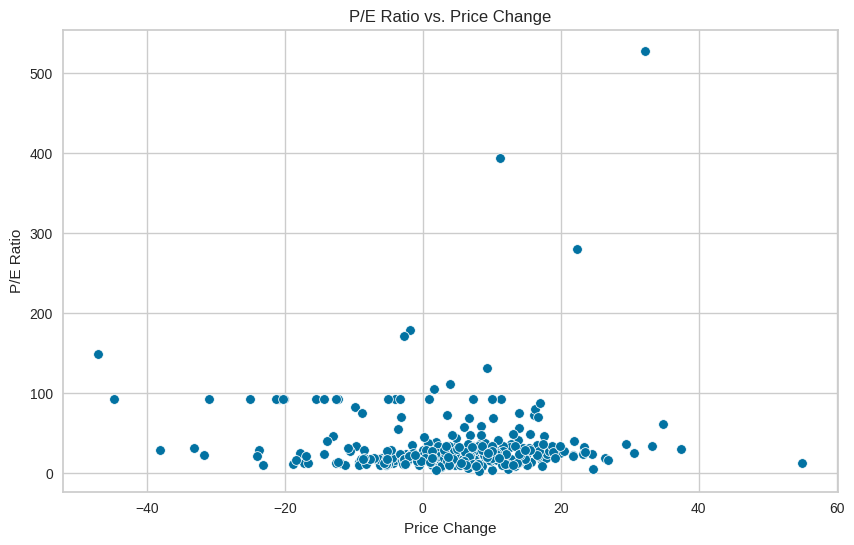

In [ ]:


plt.figure(figsize=(10, 6))
sns.scatterplot(x='Price Change', y='P/E Ratio', data=df)
plt.title('P/E Ratio vs. Price Change')
plt.xlabel('Price Change')
plt.ylabel('P/E Ratio')
plt.show()

The price change varies between -10 and 20 in relation to the P/E ratio. It suggests that there is a range of price changes associated with different P/E ratios, providing information about the potential fluctuations in stock prices relative to their earnings.

#### P/E Ratio vs. ROE

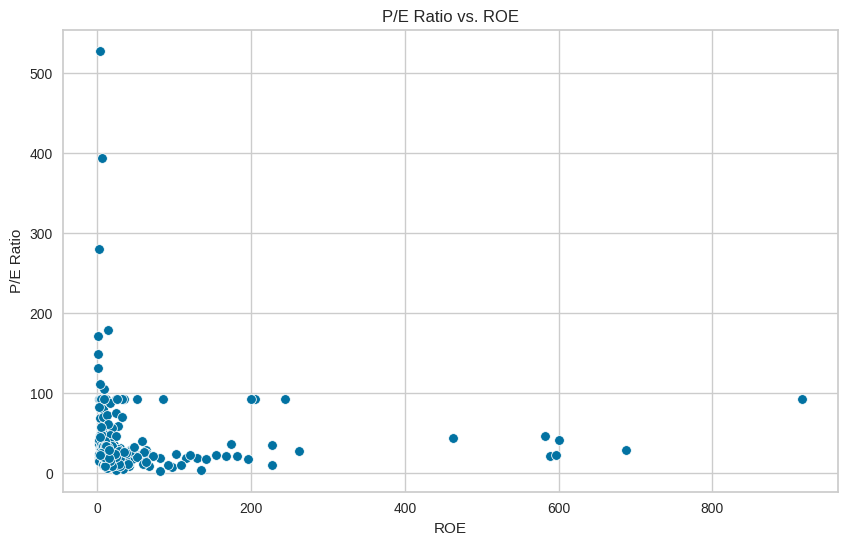

In [ ]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x='ROE', y='P/E Ratio', data=df)
plt.title('P/E Ratio vs. ROE')
plt.xlabel('ROE')
plt.ylabel('P/E Ratio')
plt.show()


The majority of the values fall within the range of 0 to 50 for ROE and within 0 to 100 for P/E Ratio.

#### Stock Price vs. Sub Industry

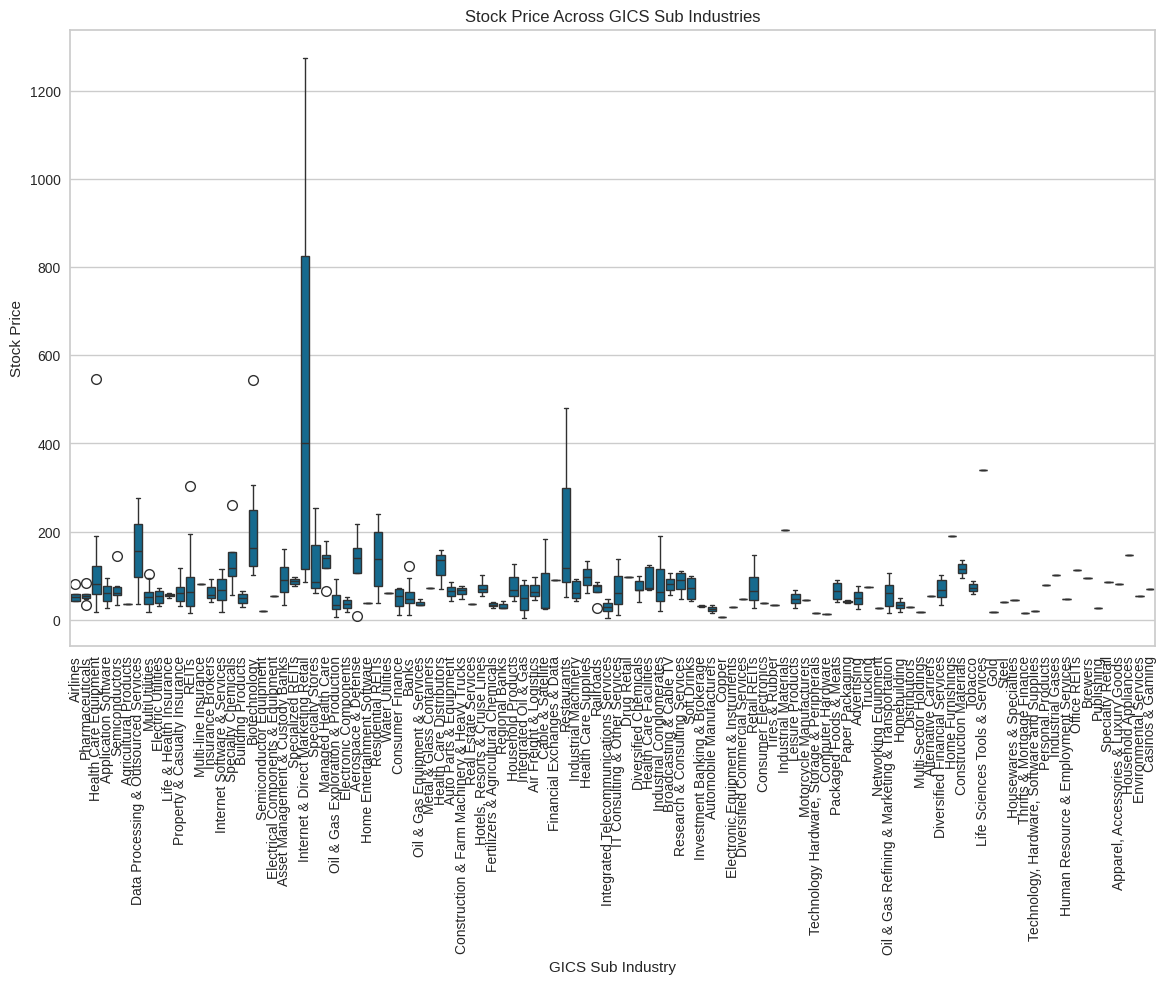

In [ ]:

plt.figure(figsize=(14, 8))
sns.boxplot(x='GICS Sub Industry', y='Current Price', data=df)
plt.title('Stock Price Across GICS Sub Industries')
plt.xlabel('GICS Sub Industry')
plt.ylabel('Stock Price')
plt.xticks(rotation=90)
plt.show()

In [ ]:
df.groupby('GICS Sub Industry')['Current Price'].mean().sort_values(ascending=False)

GICS Sub Industry
Internet & Direct Marketing Retail                 540.097492
Life Sciences Tools & Services                     339.130005
Biotechnology                                      221.297144
Restaurants                                        216.835393
Industrial Materials                               202.589996
Home Furnishings                                   189.389999
Data Processing & Outsourced Services              156.385004
Household Appliances                               146.869995
Residential REITs                                  137.980002
Specialty Chemicals                                137.407500
Specialty Stores                                   132.989999
Managed Health Care                                129.545999
Health Care Equipment                              127.925453
Aerospace & Defense                                126.624699
Health Care Distributors                           120.520002
Construction Materials                             1


The mean stock prices for the top 5 GICS Sub Industries are as follows:

Internet & Direct Marketing Retail: 540.10
Life Sciences Tools & Services: 339.13
Biotechnology: 221.30
Restaurants: 216.84
Industrial Materials: 202.59

####Estimated Shares Outstanding vs Sectors

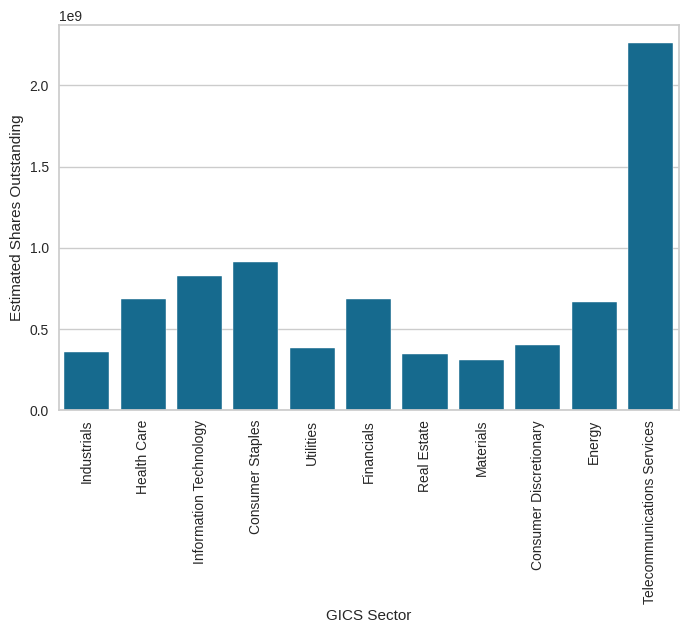

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='GICS Sector', y='Estimated Shares Outstanding', ci=False)
plt.xticks(rotation=90)
plt.show()

Telecommunication Services have the highest estimated shares outstanding.

###Questions

####1. What does the distribution of stock prices look like?

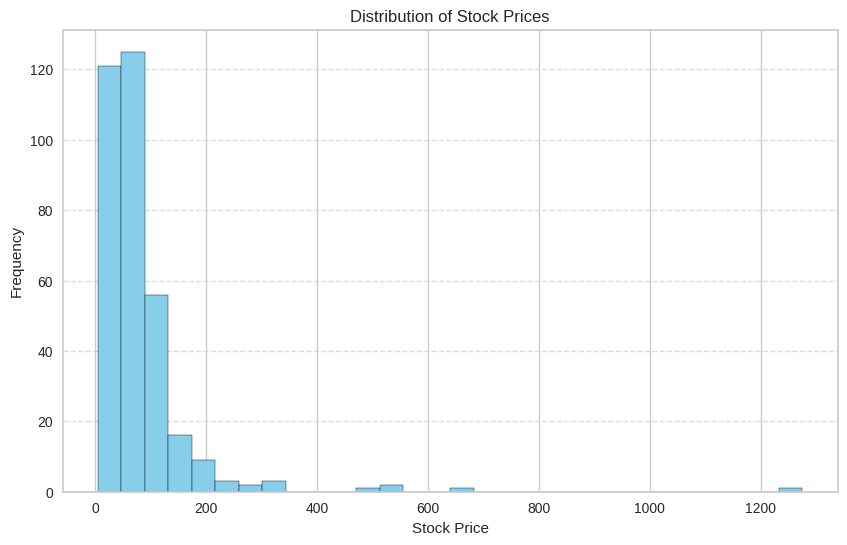

In [ ]:
stock_prices = df['Current Price']

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(stock_prices, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Stock Prices')
plt.xlabel('Stock Price')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
stock_prices = df['Current Price']

# Calculate the IQR (Interquartile Range)
Q1 = stock_prices.quantile(0.25)
Q3 = stock_prices.quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = stock_prices[(stock_prices < lower_bound) | (stock_prices > upper_bound)]

# Count the number of outliers
num_outliers = len(outliers)
print(num_outliers)

22



The identification of 22 outliers in the stock price distribution, which exhibits a right-skewed but almost normal pattern, suggests noteworthy deviations from the majority of stock prices.

####2. The stocks of which economic sector have seen the maximum price increase on average?

In [ ]:
# Group by economic sector and calculate the average price change
sector_avg_price_change = df.groupby('GICS Sector')['Price Change'].mean()

sector_avg_price_change

GICS Sector
Consumer Discretionary          5.846093
Consumer Staples                8.684750
Energy                        -10.228289
Financials                      3.865406
Health Care                     9.585652
Industrials                     2.833127
Information Technology          7.217476
Materials                       5.589738
Real Estate                     6.205548
Telecommunications Services     6.956980
Utilities                       0.803657
Name: Price Change, dtype: float64

In [ ]:
# Identify the sector with the maximum average price increase
max_avg_price_increase_sector = sector_avg_price_change.idxmax()

# Display the result
print(f"The economic sector with the maximum average price increase is: {max_avg_price_increase_sector}")

The economic sector with the maximum average price increase is: Health Care


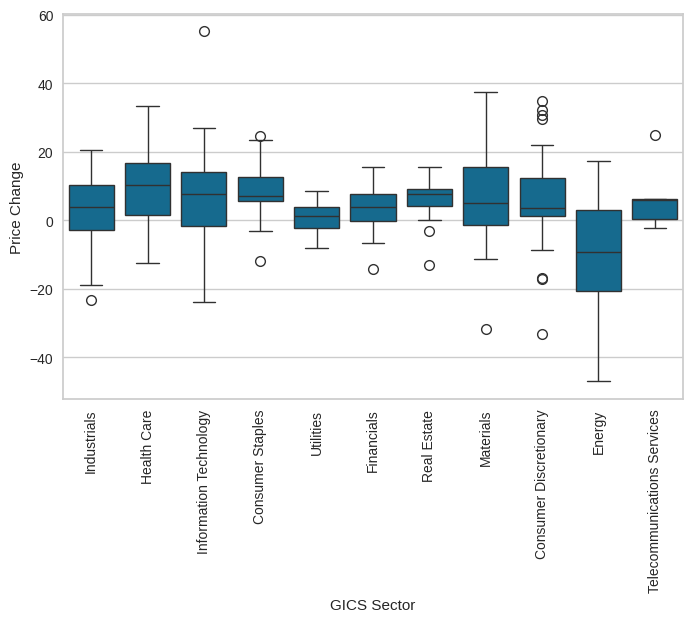

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="GICS Sector", y="Price Change")
plt.xticks(rotation=90)
plt.show()

The economic sector with the maximum average price increase is: Health Care

####3. How are the different variables correlated with each other?

In [ ]:
# Create a correlation matrix
correlation_matrix = df.corr()
correlation_matrix

Current Price  Price Change  Volatility  \
Current Price                      1.000000      0.134982   -0.124257   
Price Change                       0.134982      1.000000   -0.408281   
Volatility                        -0.124257     -0.408281    1.000000   
ROE                               -0.000549     -0.043310    0.162532   
Cash Ratio                         0.127816      0.168586    0.020605   
Net Cash Flow                     -0.021961      0.026746   -0.014172   
Net Income                         0.036625      0.179298   -0.383433   
Earnings Per Share                 0.479604      0.175401   -0.379309   
Estimated Shares Outstanding      -0.145306      0.033656   -0.095704   
P/E Ratio                          0.260273     -0.002491    0.263600   
P/B Ratio                          0.124634      0.034329    0.046528   

                                   ROE  Cash Ratio  Net Cash Flow  Net Income  \
Current Price                -0.000549    0.127816      -0.021961    0.036625   
Price Change                 -0.043310    0.168586       0.026746    0.179298   
Volatility                    0.162532    0.020605      -0.014172   -0.383433   
ROE                           1.000000   -0.069122      -0.052205   -0.288524   
Cash Ratio                   -0.069122    1.000000       0.113819    0.028589   
Net Cash Flow                -0.052205    0.113819       1.000000    0.044229   
Net Income                   -0.288524    0.028589       0.044229    1.000000   
Earnings Per Share           -0.405291    0.024759       0.019348    0.557752   
Estimated Shares Outstanding -0.030288    0.135869      -0.051392    0.589310   
P/E Ratio                     0.023341    0.089483       0.026876   -0.224022   
P/B Ratio                    -0.063218    0.229672       0.057039   -0.061544   

                              Earnings Per Share  \
Current Price                           0.479604   
Price Change                            0.175401   
Volatility                             -0.379309   
ROE                                    -0.405291   
Cash Ratio                              0.024759   
Net Cash Flow                           0.019348   
Net Income                              0.557752   
Earnings Per Share                      1.000000   
Estimated Shares Outstanding           -0.026906   
P/E Ratio                              -0.260660   
P/B Ratio                               0.014915   

                              Estimated Shares Outstanding  P/E Ratio  \
Current Price                                    -0.145306   0.260273   
Price Change                                      0.033656  -0.002491   
Volatility                                       -0.095704   0.263600   
ROE                                              -0.030288   0.023341   
Cash Ratio                                        0.135869   0.089483   
Net Cash Flow                                    -0.051392   0.026876   
Net Income                                        0.589310  -0.224022   
Earnings Per Share                               -0.026906  -0.260660   
Estimated Shares Outstanding                      1.000000  -0.014551   
P/E Ratio                                        -0.014551   1.000000   
P/B Ratio                                        -0.028155   0.036422   

                              P/B Ratio  
Current Price                  0.124634  
Price Change                   0.034329  
Volatility                     0.046528  
ROE                           -0.063218  
Cash Ratio                     0.229672  
Net Cash Flow                  0.057039  
Net Income                    -0.061544  
Earnings Per Share             0.014915  
Estimated Shares Outstanding  -0.028155  
P/E Ratio                      0.036422  
P/B Ratio                      1.000000

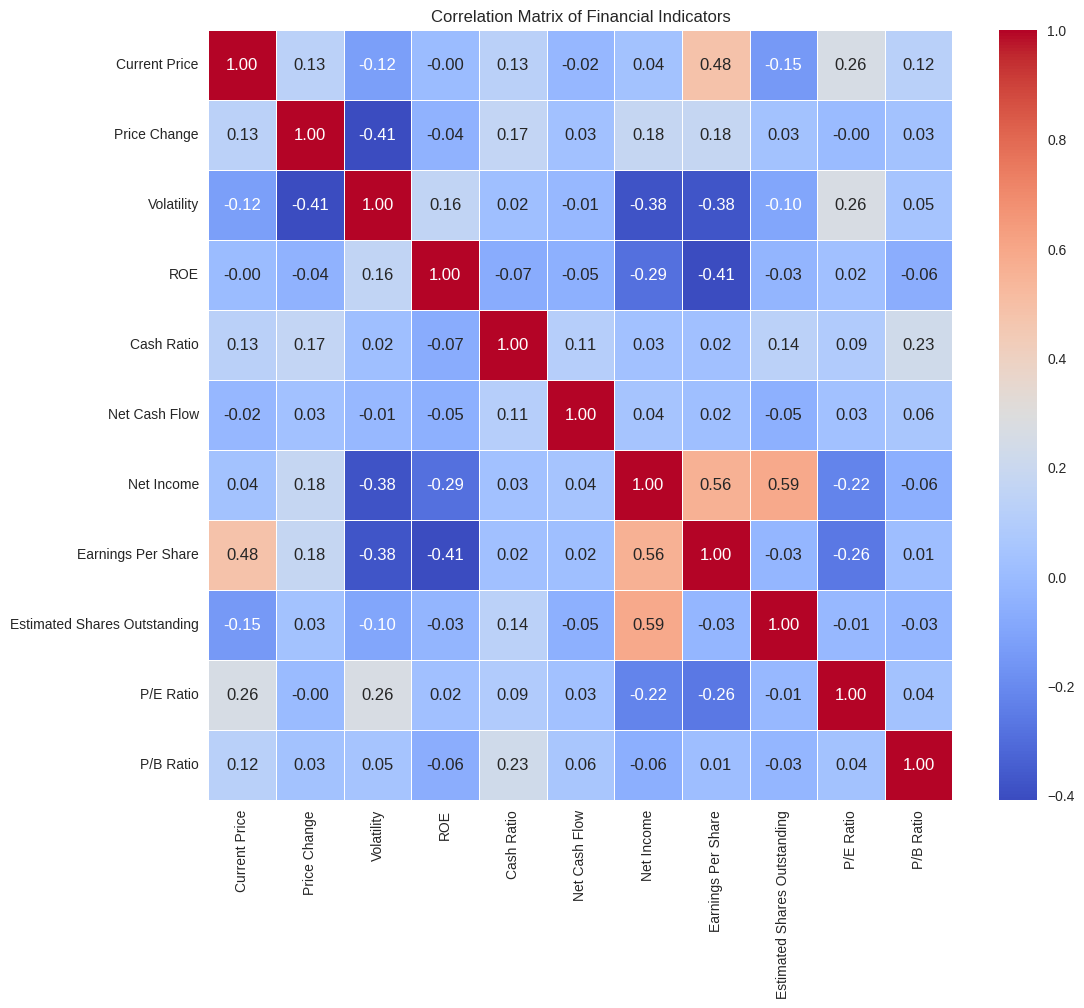

In [ ]:
# Plot the correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Financial Indicators')
plt.show()

1. Positive Correlations:
> Current Price has a strong positive correlation with Earnings Per Share (0.48), Net Income (0.04), and P/E Ratio (0.26).
Earnings Per Share and Net Income exhibit a strong positive correlation (0.56).

2. Negative Correlations:
> Volatility has a moderate negative correlation with Price Change (-0.41) and a weaker negative correlation with Earnings Per Share (-0.38).
P/E Ratio and Net Income show a negative correlation (-0.26).

3. Weak Correlations:
> Current Price has weak correlations with Price Change (0.13), Volatility (-0.12), and ROE (-0.00).
Earnings Per Share and P/B Ratio have a weak positive correlation (0.03).

####4. Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. How does the average cash ratio vary across economic sectors?



In [ ]:
# Group by economic sector and calculate the average cash ratio
avg_cash_ratio_by_sector = df.groupby('GICS Sector')['Cash Ratio'].mean()

# Display the result
print(avg_cash_ratio_by_sector)

GICS Sector
Consumer Discretionary          49.575000
Consumer Staples                70.947368
Energy                          51.133333
Financials                      98.591837
Health Care                    103.775000
Industrials                     36.188679
Information Technology         149.818182
Materials                       41.700000
Real Estate                     50.111111
Telecommunications Services    117.000000
Utilities                       13.625000
Name: Cash Ratio, dtype: float64


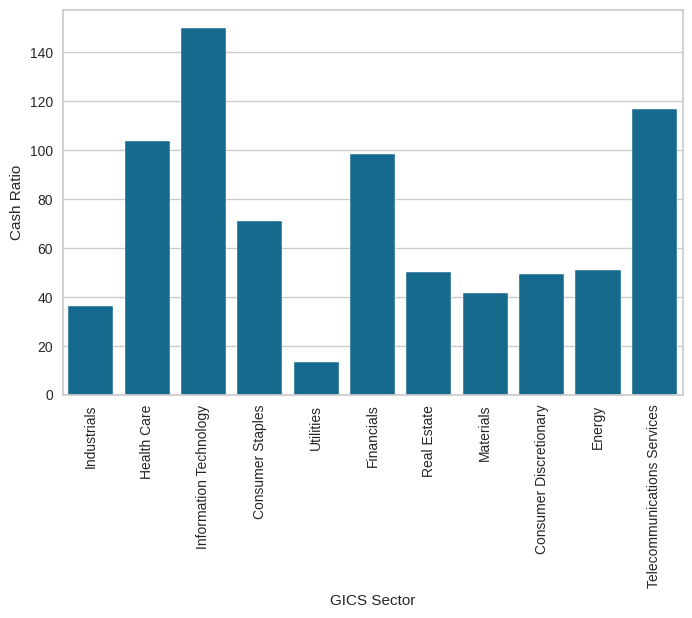

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(data=df, x= 'GICS Sector', y='Cash Ratio', ci=False)
plt.xticks(rotation=90)
plt.show()

Top 3 Sectors:

1. Information Technology: 149.82
2. Telecommunications Services: 117.00
3. Health Care: 103.78

Bottom 3 Sectors:
1. Utilities: 13.63
2. Industrials: 36.19
3. Materials: 41.70



####5. P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. How does the P/E ratio vary, on average, across economic sectors?

In [ ]:
# Group by economic sector and calculate the average P/E ratio
avg_pe_ratio_by_sector = df.groupby('GICS Sector')['P/E Ratio'].mean()

# Display the result
print(avg_pe_ratio_by_sector)

GICS Sector
Consumer Discretionary         35.211613
Consumer Staples               25.521195
Energy                         72.897709
Financials                     16.023151
Health Care                    41.135272
Industrials                    18.259380
Information Technology         43.782546
Materials                      24.585352
Real Estate                    43.065585
Telecommunications Services    12.222578
Utilities                      18.719412
Name: P/E Ratio, dtype: float64


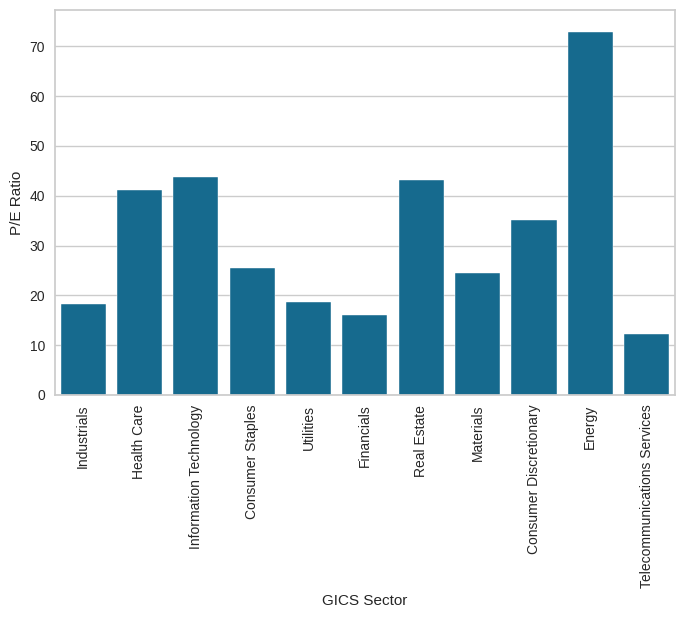

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='GICS Sector', y='P/E Ratio', ci=False)
plt.xticks(rotation=90)
plt.show()

* Energy: This sector has the highest average P/E ratio, indicating that investors are willing to pay a relatively higher amount for a share compared to its earnings in the Energy sector.

* Telecommunications Services: This sector has the lowest average P/E ratio, suggesting a more conservative valuation approach or lower growth expectations in this sector.

* Financials: Financials have a relatively low average P/E ratio, indicating that investors may be more conservative in their valuation approach in this sector.

* Information Technology: This sector has a moderate average P/E ratio, suggesting a balance between growth expectations and valuation considerations.

* Consumer Discretionary and Health Care: These sectors have average P/E ratios above 35, indicating that investors are willing to pay a relatively higher amount for shares in these sectors.

* Utilities: Utilities have a moderate average P/E ratio, reflecting a balance between valuation and growth considerations.

## Data Preprocessing



- Duplicate value check - No duplicate entries were found in the dataset, as confirmed earlier.
- Missing value treatment - No Missing values were found in the dataset, as confirmed earlier.
- Outlier check- Lets plot the outliers to check in the data.


###Outliers

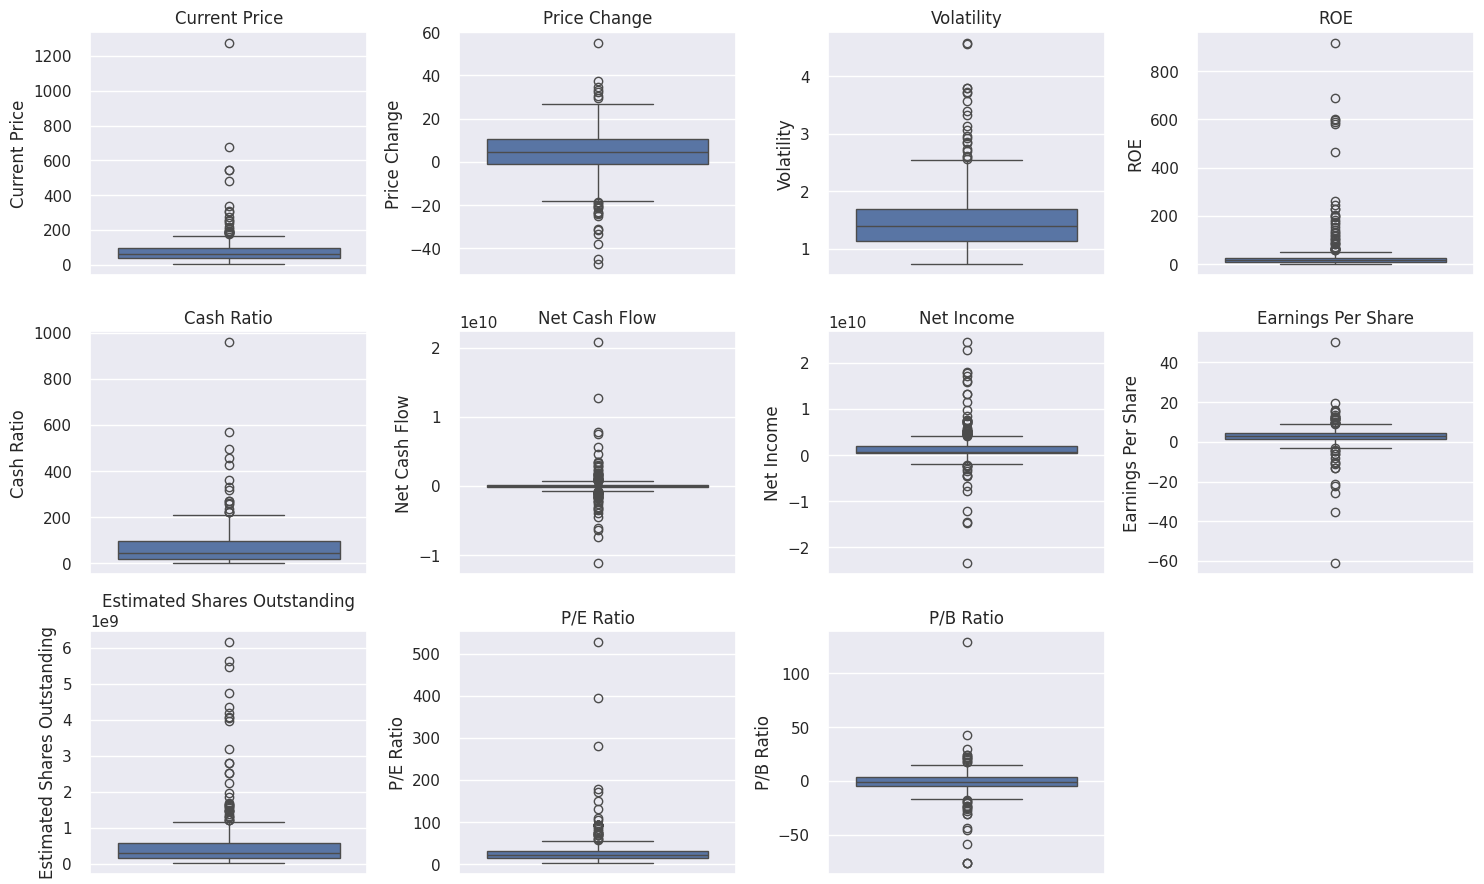

In [ ]:
plt.figure(figsize=(15, 12))

numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

In [ ]:
data=df.copy()
def treat_outliers(df, col):
    """
    treats outliers in a variable
    col: str, name of the numerical variable
    df: dataframe
    col: name of the column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # all values smaller than Lower_Whisker will be assigned value of Lower_Whisker
    # all values greater than Upper_Whisker will be assigned value of Upper_Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)

    return df


def treat_outliers_apply(df, col_list):
    """
    treat outlier in all numerical variables
    col_list: list of numerical variables
    df: data frame
    """
    for c in col_list:
        df = treat_outliers(df, c)

    return df

In [ ]:
data = treat_outliers_apply(data, numeric_columns)

* Outliers were identified in all numeric columns, and it's important to note that Euclidean distance, a common metric in clustering algorithms, is sensitive to outliers.
* To mitigate the impact of outliers on clustering algorithms and normalize distributions, capping and clipping methods can be applied. Specifically, values below the lower whisker will be substituted with the lower whisker value, and values exceeding the upper whisker will be substituted with the upper whisker value.
* This approach aims to enhance the robustness of clustering algorithms by handling extreme values within the data.

###Scaling


Before advancing with clustering, it's advisable to standardize the data by applying scaling techniques.






In [ ]:
# scaling data before clustering
scaler = StandardScaler()
subset = data[numeric_columns].copy()
subset_scaled = scaler.fit_transform(subset)
# creating a dataframe of scaled data
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)
subset_scaled_df.head()

Current Price  Price Change  Volatility       ROE  Cash Ratio  \
0      -0.650712      0.549287    0.448212  2.116831   -0.207311   
1      -0.257962      0.387909    1.568844  2.116831    0.238584   
2      -0.591183      0.675734   -0.459081  0.031532    0.067086   
3       0.548932      0.935802   -0.274700 -0.753522    2.005016   
4      -0.349115     -0.600175    0.478969 -0.426416    2.699583   

   Net Cash Flow  Net Income  Earnings Per Share  \
0      -1.433763    1.977138            2.114902   
1       0.133007    1.977138            0.017981   
2       1.722229    1.977138           -0.054640   
3      -0.565079   -0.371735           -0.635605   
4       0.764786   -0.327678           -0.964127   

   Estimated Shares Outstanding  P/E Ratio  P/B Ratio  
0                      0.645054  -1.493768  -0.997339  
1                      2.124799  -0.462139  -0.992836  
2                      2.124799  -0.703554   0.108970  
3                      0.171420   2.138684   0.714710  
4                      2.124799   2.138684   0.300691

## K-means Clustering

#### Checking Elbow Plot

In [ ]:
Kmean_df= subset_scaled_df.copy()

Number of Clusters: 2 	Average Distortion: 2.9507542400143842
Number of Clusters: 3 	Average Distortion: 2.759761533270845
Number of Clusters: 4 	Average Distortion: 2.63153843620545
Number of Clusters: 5 	Average Distortion: 2.5345886566890665
Number of Clusters: 6 	Average Distortion: 2.4703313338147543
Number of Clusters: 7 	Average Distortion: 2.3892036349104346
Number of Clusters: 8 	Average Distortion: 2.3415378767145505
Number of Clusters: 9 	Average Distortion: 2.302109092619317
Number of Clusters: 10 	Average Distortion: 2.2377809582576833
Number of Clusters: 11 	Average Distortion: 2.204551626221652
Number of Clusters: 12 	Average Distortion: 2.183120889408329
Number of Clusters: 13 	Average Distortion: 2.136519876101571
Number of Clusters: 14 	Average Distortion: 2.1093177250276294


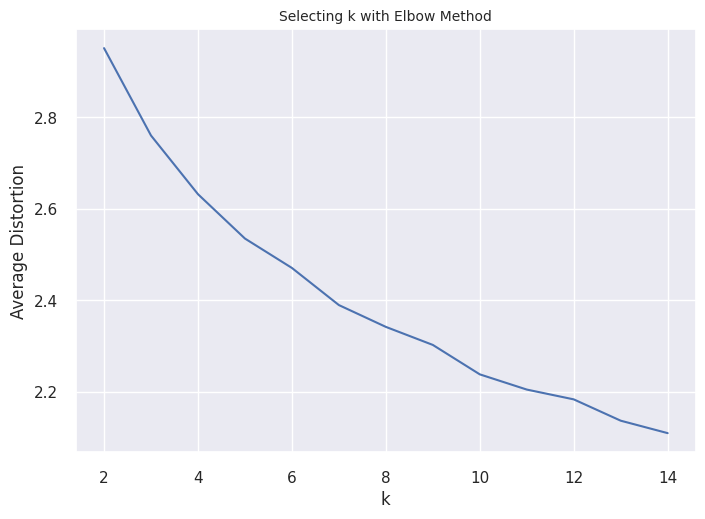

In [ ]:
clusters = range(2, 15)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k, random_state=1)
    model.fit(Kmean_df)
    prediction = model.predict(Kmean_df)
    distortion = (
        sum(np.min(cdist(Kmean_df, model.cluster_centers_, "euclidean"), axis=1))
        / Kmean_df.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with Elbow Method", fontsize=10)
plt.show()

**Appropriate value for k seems to be 3, 4 or 5.**

#### Let's check the silhouette scores

For n_clusters = 2, Silhouette score: 0.1813917845511489, Negative Sample Count: 87
For n_clusters = 3, Silhouette score: 0.2013178022396162, Negative Sample Count: 125
For n_clusters = 4, Silhouette score: 0.1775516689983719, Negative Sample Count: 175
For n_clusters = 5, Silhouette score: 0.14972776182035555, Negative Sample Count: 206
For n_clusters = 6, Silhouette score: 0.16711425323428922, Negative Sample Count: 191
For n_clusters = 7, Silhouette score: 0.14008553308115673, Negative Sample Count: 229
For n_clusters = 8, Silhouette score: 0.14396383063614537, Negative Sample Count: 231
For n_clusters = 9, Silhouette score: 0.12454439223498706, Negative Sample Count: 238
For n_clusters = 10, Silhouette score: 0.1278094937691143, Negative Sample Count: 238
For n_clusters = 11, Silhouette score: 0.13138399975674056, Negative Sample Count: 273
For n_clusters = 12, Silhouette score: 0.1212448424970693, Negative Sample Count: 246
For n_clusters = 13, Silhouette score: 0.1241716305069956

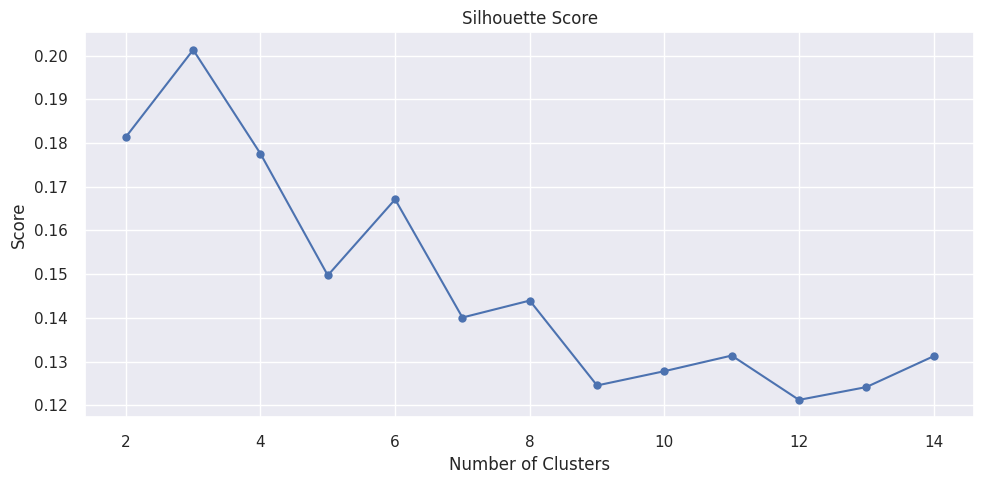

In [ ]:


sil_score = []
negative_sample_counts = []

cluster_list = list(range(2, 15))

for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(Kmean_df)

    # Calculate silhouette score
    score = silhouette_score(Kmean_df, preds)
    sil_score.append(score)

    # Calculate silhouette values for each sample
    silhouette_values = silhouette_samples(Kmean_df, preds)

    # Identify clusters with negative silhouette scores
    clusters_with_negative_silhouette = np.unique(preds[silhouette_values < 0])

    # Count the number of samples in clusters with negative silhouette scores
    num_samples_in_negative_clusters = np.sum(np.isin(preds, clusters_with_negative_silhouette))
    negative_sample_counts.append(num_samples_in_negative_clusters)

    print(f"For n_clusters = {n_clusters}, Silhouette score: {score}, Negative Sample Count: {num_samples_in_negative_clusters}")

plt.figure(figsize=(10, 5))

# Plot Silhouette score
plt.plot(cluster_list, sil_score, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.tight_layout()
plt.show()

Based on the silhouette scores, considering values like 3 to 6 clusters as they have relatively higher scores. It's essential to choose a number of clusters that maximizes the silhouette score while still providing meaningful insights. The negative sample count indicates the number of samples that were assigned to the cluster with the lowest silhouette score.

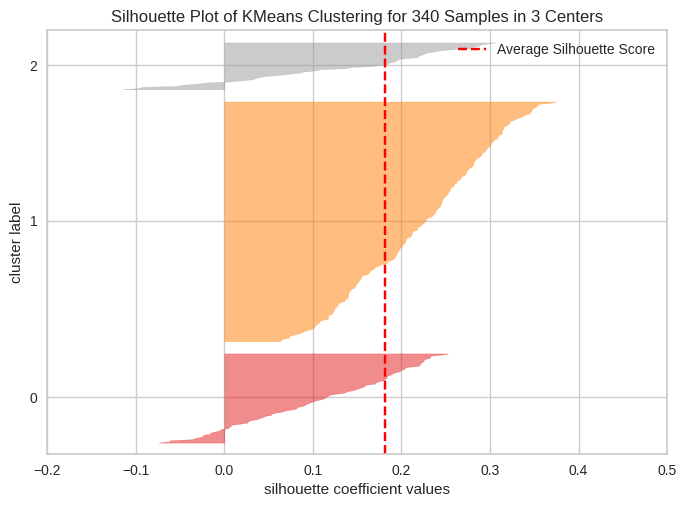

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(3, random_state=1))
visualizer.fit(Kmean_df)
visualizer.show()

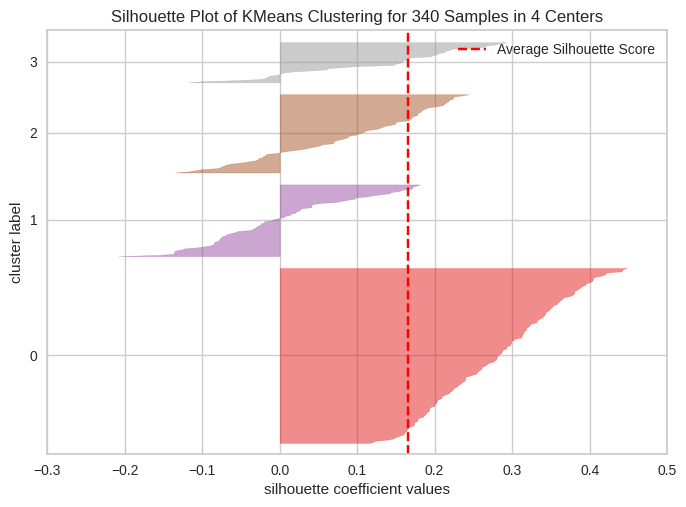

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(4, random_state=1))
visualizer.fit(Kmean_df)
visualizer.show()

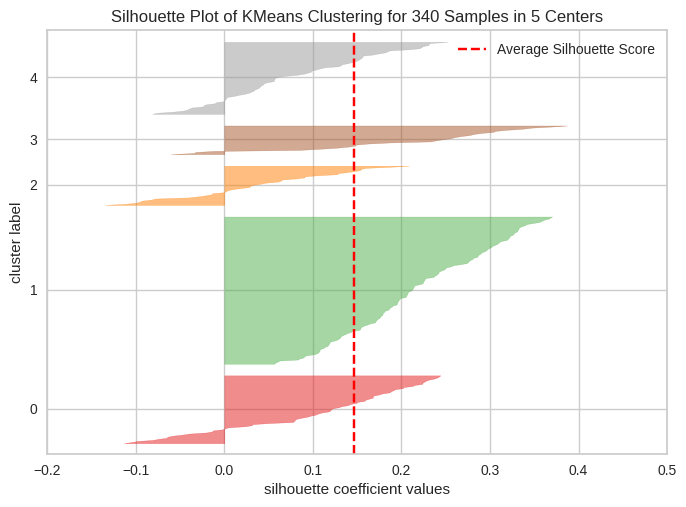

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(5, random_state=1))
visualizer.fit(Kmean_df)
visualizer.show()

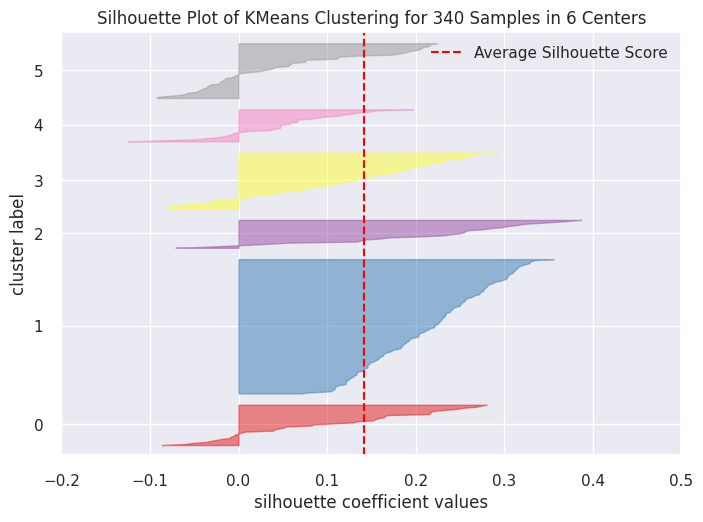

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(6, random_state=1))
visualizer.fit(Kmean_df)
visualizer.show()

###Creating final model:

In [ ]:
# let's take 3 as number of clusters
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(Kmean_df)

KMeans(n_clusters=4, random_state=0)

In [ ]:
# adding kmeans cluster labels to the original and scaled dataframes

data["K_means_segments"] = kmeans.labels_
Kmean_df["K_means_segments"] = kmeans.labels_

#### Cluster Profiling

In [ ]:
cluster_profile = data.groupby("K_means_segments").mean()

In [ ]:
cluster_profile["count_in_each_segments"] = (
    data.groupby("K_means_segments")['Security'].count().values
)

In [ ]:
# let's display cluster profiles
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

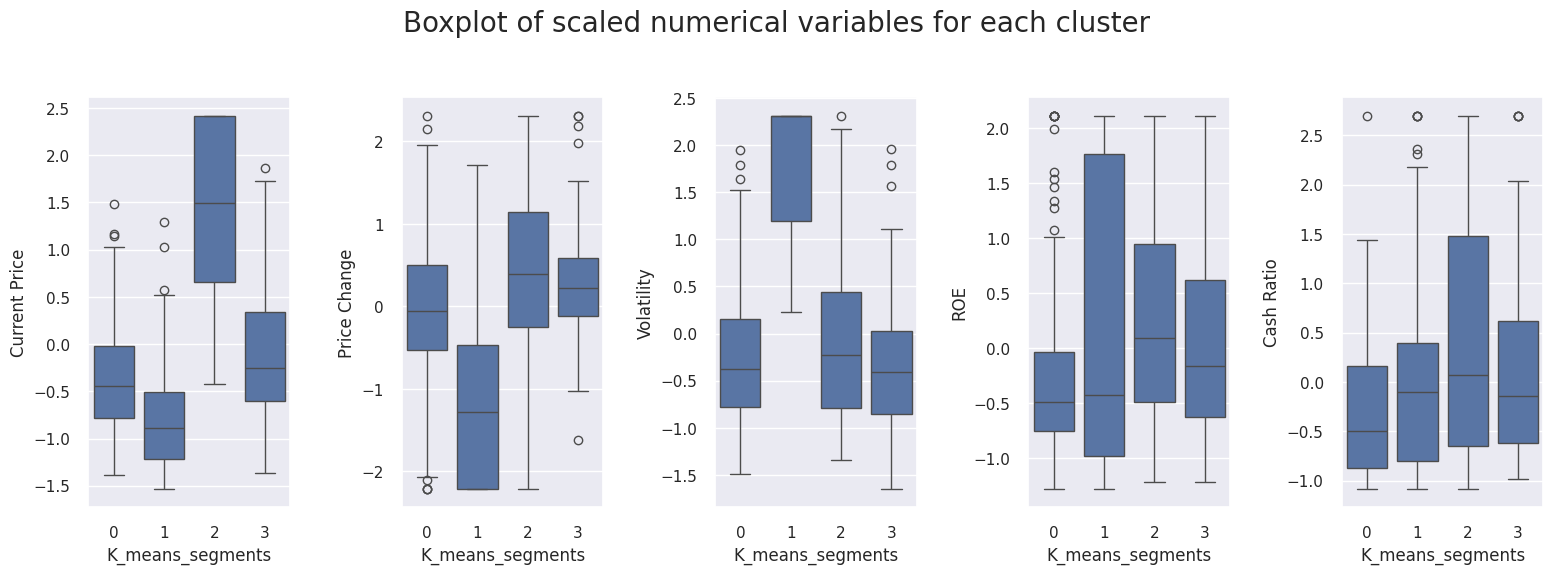

In [ ]:
fig, axes = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle("Boxplot of scaled numerical variables for each cluster", fontsize=20)
counter = 0
for ii in range(5):
    sns.boxplot(
        ax=axes[ii],
        y=Kmean_df[numeric_columns[counter]],
        x=Kmean_df["K_means_segments"],
    )
    counter = counter + 1

fig.tight_layout(pad=2.0)

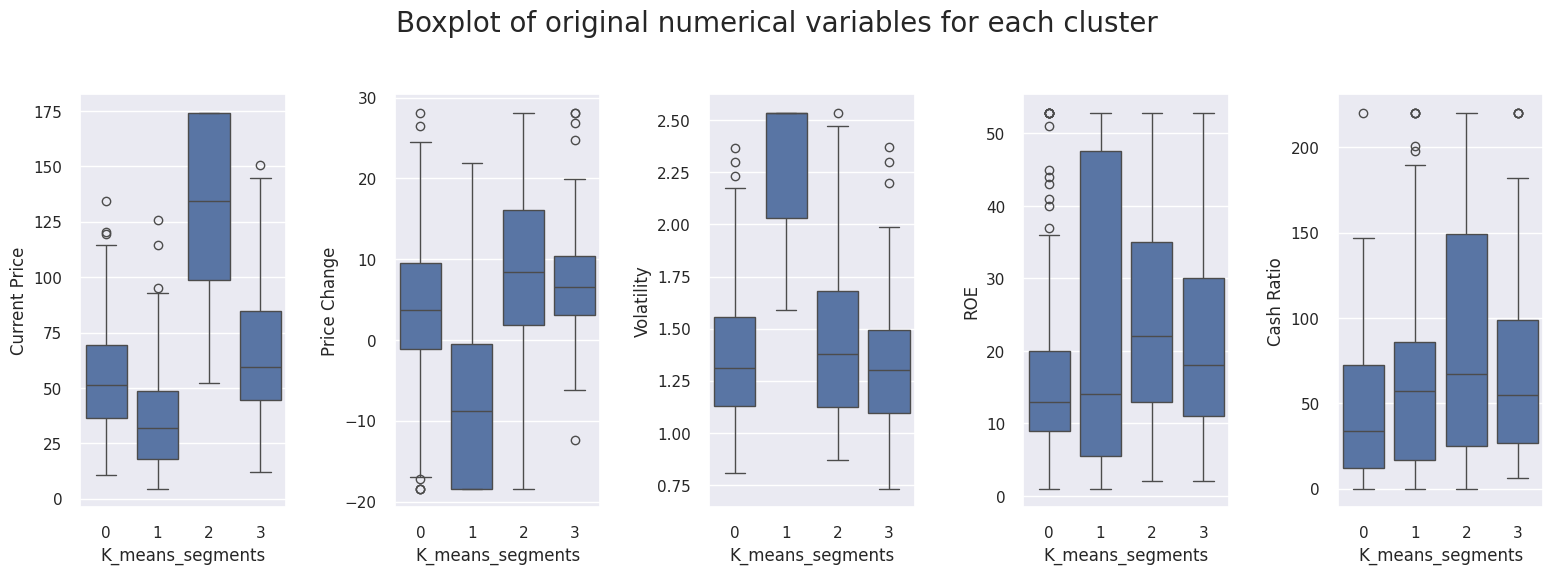

In [ ]:
fig, axes = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle("Boxplot of original numerical variables for each cluster", fontsize=20)
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii], y=data[numeric_columns[counter]], x=data["K_means_segments"])
    counter = counter + 1

fig.tight_layout(pad=2.0)

In [ ]:
## code to print companies in each cluster

for cl in data["GICS Sector"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(data[data["GICS Sector"] == cl]["Security"].unique())
    print()

In cluster Industrials, the following companies are present:
['American Airlines Group' 'Alaska Air Group Inc' 'Allegion' 'AMETEK Inc'
 'Arconic Inc' 'Boeing Company' 'Caterpillar Inc.'
 'C. H. Robinson Worldwide' 'Cummins Inc.' 'CSX Corp.' 'Delta Air Lines'
 'Deere & Co.' 'Danaher Corp.' 'Dun & Bradstreet' 'Dover Corp.'
 'Equifax Inc.' 'Eaton Corporation' "Expeditors Int'l" 'Fastenal Co'
 'Fortune Brands Home & Security' 'Fluor Corp.' 'Flowserve Corporation'
 'General Dynamics' 'Grainger (W.W.) Inc.' "Honeywell Int'l Inc."
 'Illinois Tool Works' 'J. B. Hunt Transport Services'
 'Jacobs Engineering Group' 'Kansas City Southern' 'Leggett & Platt'
 'L-3 Communications Holdings' 'Lockheed Martin Corp.'
 'Southwest Airlines' 'Masco Corp.' '3M Company' 'Nielsen Holdings'
 'Norfolk Southern Corp.' 'Pitney-Bowes' 'PACCAR Inc.' 'Pentair Ltd.'
 'Quanta Services Inc.' 'Ryder System' 'Robert Half International'
 'Roper Industries' 'Republic Services Inc' 'Stericycle Inc'
 'United Continental Hold

In [ ]:
data.groupby(["K_means_segments", "GICS Sector"])['Security'].count()

K_means_segments  GICS Sector                
0                 Consumer Discretionary         24
                  Consumer Staples                8
                  Financials                     25
                  Health Care                    11
                  Industrials                    29
                  Information Technology         10
                  Materials                       9
                  Real Estate                    20
                  Telecommunications Services     1
                  Utilities                      21
1                 Energy                         24
                  Health Care                     2
                  Industrials                     2
                  Information Technology          5
                  Materials                       4
                  Real Estate                     1
                  Telecommunications Services     1
2                 Consumer Discretionary         11
                  

#### Insights


**Cluster 0 (82 companies):**
  - Mainly comprised of Consumer Discretionary, Industrials, and Information Technology sectors.
  - Moderate stock prices, price changes, and volatility.
  - Low to medium ROE and cash ratio.
  - Moderate net cash flow and net income.
  - Low to medium earnings per share.
  - Moderate P/E ratio.

**Cluster 1 (215 companies):**
  - Dominated by Health Care, Consumer Discretionary, and Industrials sectors.
  - High stock prices and price changes with medium volatility.
  - High ROE and cash ratio.
  - Moderate net cash flow and net income.
  - High earnings per share.
  - Moderate P/E ratio.
- **Note: This cluster has the highest stock price, price change, ROE, cash ratio, and earnings per share among all clusters.**

**Cluster 2 (43 companies):**
  - Mainly consists of Energy, Consumer Discretionary, and Information Technology sectors.
  - Moderate stock prices with a notable negative price change and high volatility.
  - Moderate ROE and cash ratio.
  - Negative net cash flow and net income.
  - Negative earnings per share.
  - High P/E ratio.
- **Note: This cluster has the highest net cash flow, net income, and estimated outstanding shares among all clusters.**



**K=4:**
* **Average Distortion:** 2.5346
* **Silhouette Score:** 0.1497
* **Cluster Profiling:**
>* Cluster 0: Moderate Price Change, Moderate Volatility, Moderate ROE
>* Cluster 1: Negative Price Change, High Volatility, High ROE
>* Cluster 2: Positive Price Change, Low Volatility, Low ROE
>* Cluster 3: Positive Price Change, Moderate Volatility, High ROE

1. **Average Distortion:** For k=3, the distortion is higher than for k=4.
For k=4, the distortion decreases, indicating a better representation of the data.
This suggests that adding one more cluster improves the clustering performance.

2. **Silhouette Score:**Silhouette score measures how well-separated the clusters are. Higher silhouette scores indicate better-defined clusters.
For k=4, the silhouette score is reasonable, indicating reasonable separation between clusters.

3. **Cluster Profiling:**The profiling for k=4 provides distinct clusters with diverse characteristics.Each cluster represents a group of stocks with unique features, contributing to better diversification.

Considering these factors, k=4 seems to strike a balance between representing the data well, providing reasonable separation between clusters, and offering diverse characteristics within each cluster.

## Hierarchical Clustering

### Computing Cophenetic Correlation

In [ ]:
hier_df=subset_scaled_df.copy()

In [ ]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(hier_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(hier_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

Cophenetic correlation for Euclidean distance and single linkage is 0.6932108674136777.
Cophenetic correlation for Euclidean distance and complete linkage is 0.6147798823663769.
Cophenetic correlation for Euclidean distance and average linkage is 0.7325610568988987.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.6496438783746494.
Cophenetic correlation for Chebyshev distance and single linkage is 0.7214024727237498.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.36805931247944257.
Cophenetic correlation for Chebyshev distance and average linkage is 0.7011385715318806.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.5032471223561586.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.6176064847170998.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.3854304450443971.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.6415876007925729.
Cophenetic c

In [ ]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.7325610568988987, which is obtained with Euclidean distance and average linkage.


**Let's explore different linkage methods with Euclidean distance only.**

In [ ]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(subset_scaled_df, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(hier_df))
    print("Cophenetic correlation of ecludiean metric with {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

Cophenetic correlation of ecludiean metric with single linkage is 0.7130559712913352.
Cophenetic correlation of ecludiean metric with complete linkage is 0.6581906593207334.
Cophenetic correlation of ecludiean metric with average linkage is 0.7735743271435163.
Cophenetic correlation of ecludiean metric with centroid linkage is 0.7646777366312195.
Cophenetic correlation of ecludiean metric with ward linkage is 0.602410239319621.
Cophenetic correlation of ecludiean metric with weighted linkage is 0.6806697865505413.


In [ ]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.7325610568988987, which is obtained with average linkage.


* For Euclidean distance, average linkage performs the best, followed by centroid and weighted linkages.
* For Chebyshev and Cityblock distances, average linkage shows strong cophenetic correlation.
* Mahalanobis distance exhibits reasonable correlation across different linkage methods.

 The average linkage method with Euclidean distance could be a good choice for hierarchical clustering in this scenario, as it consistently shows higher cophenetic correlation coefficients.




### Checking Dendrograms

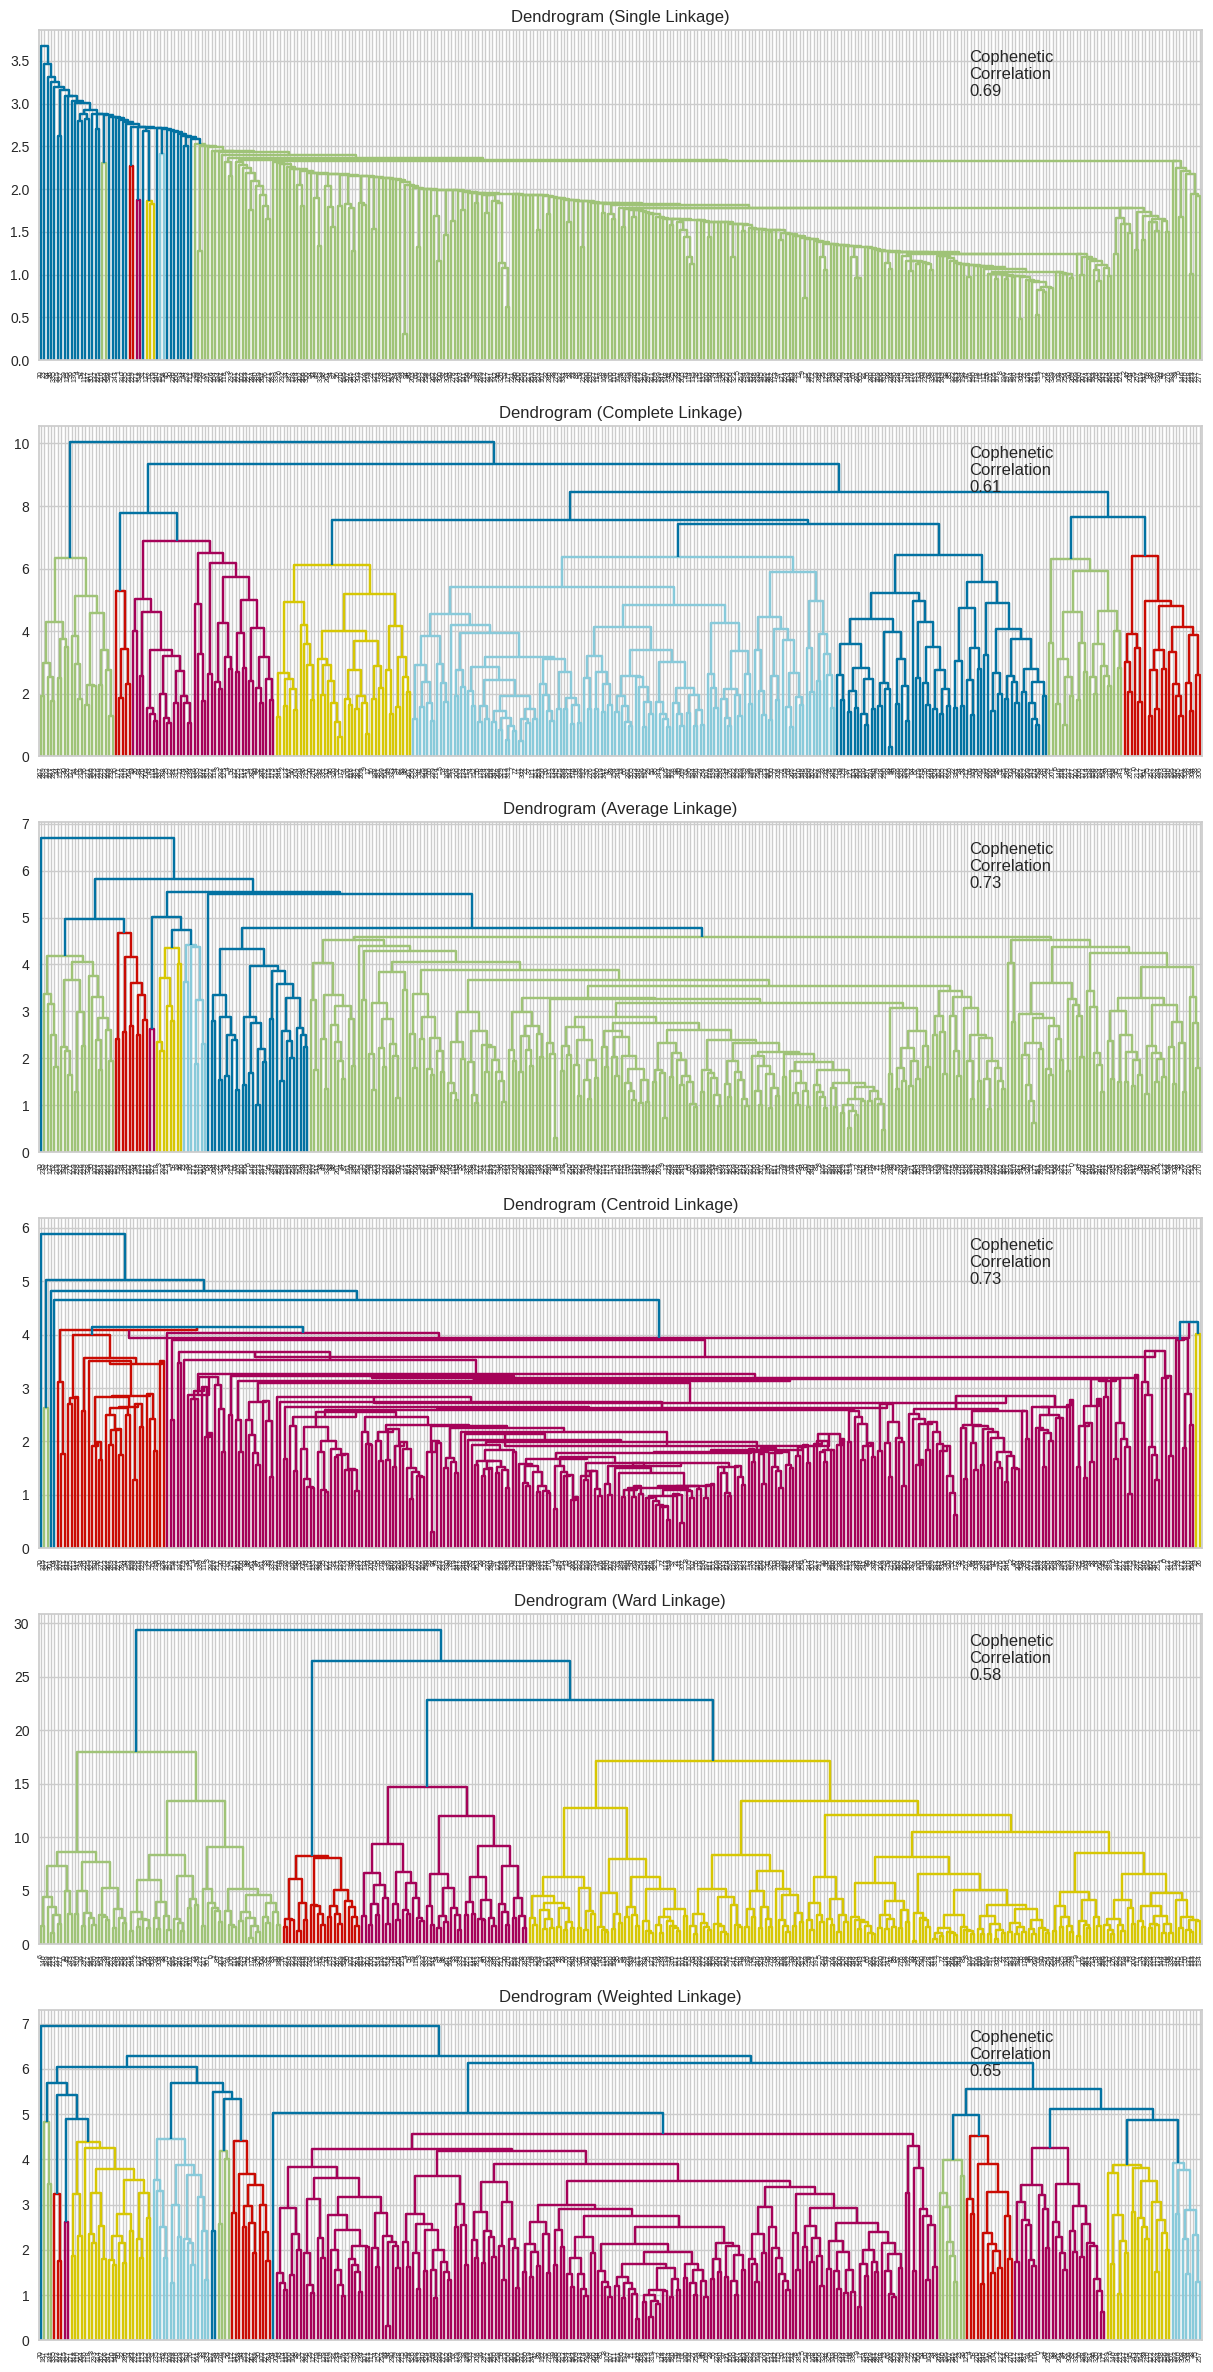

In [ ]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]
compare = []

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(hier_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(hier_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

    compare.append([method, coph_corr])

**Observations**

- Dendrogram for Ward linkage and complete linkage shows distinct and separate clusters.

In [ ]:
# let's create a dataframe to compare cophenetic correlations for each linkage method
df_cc = pd.DataFrame(compare, columns=compare_cols)
df_cc

Linkage  Cophenetic Coefficient
0    single                0.693211
1  complete                0.614780
2   average                0.732561
3  centroid                0.729433
4      ward                0.575331
5  weighted                0.649644

**Let's see the dendrogram for Chebyshev and Cityblock distances with average and single linkage methods (as they gave high cophenetic correlation values).**

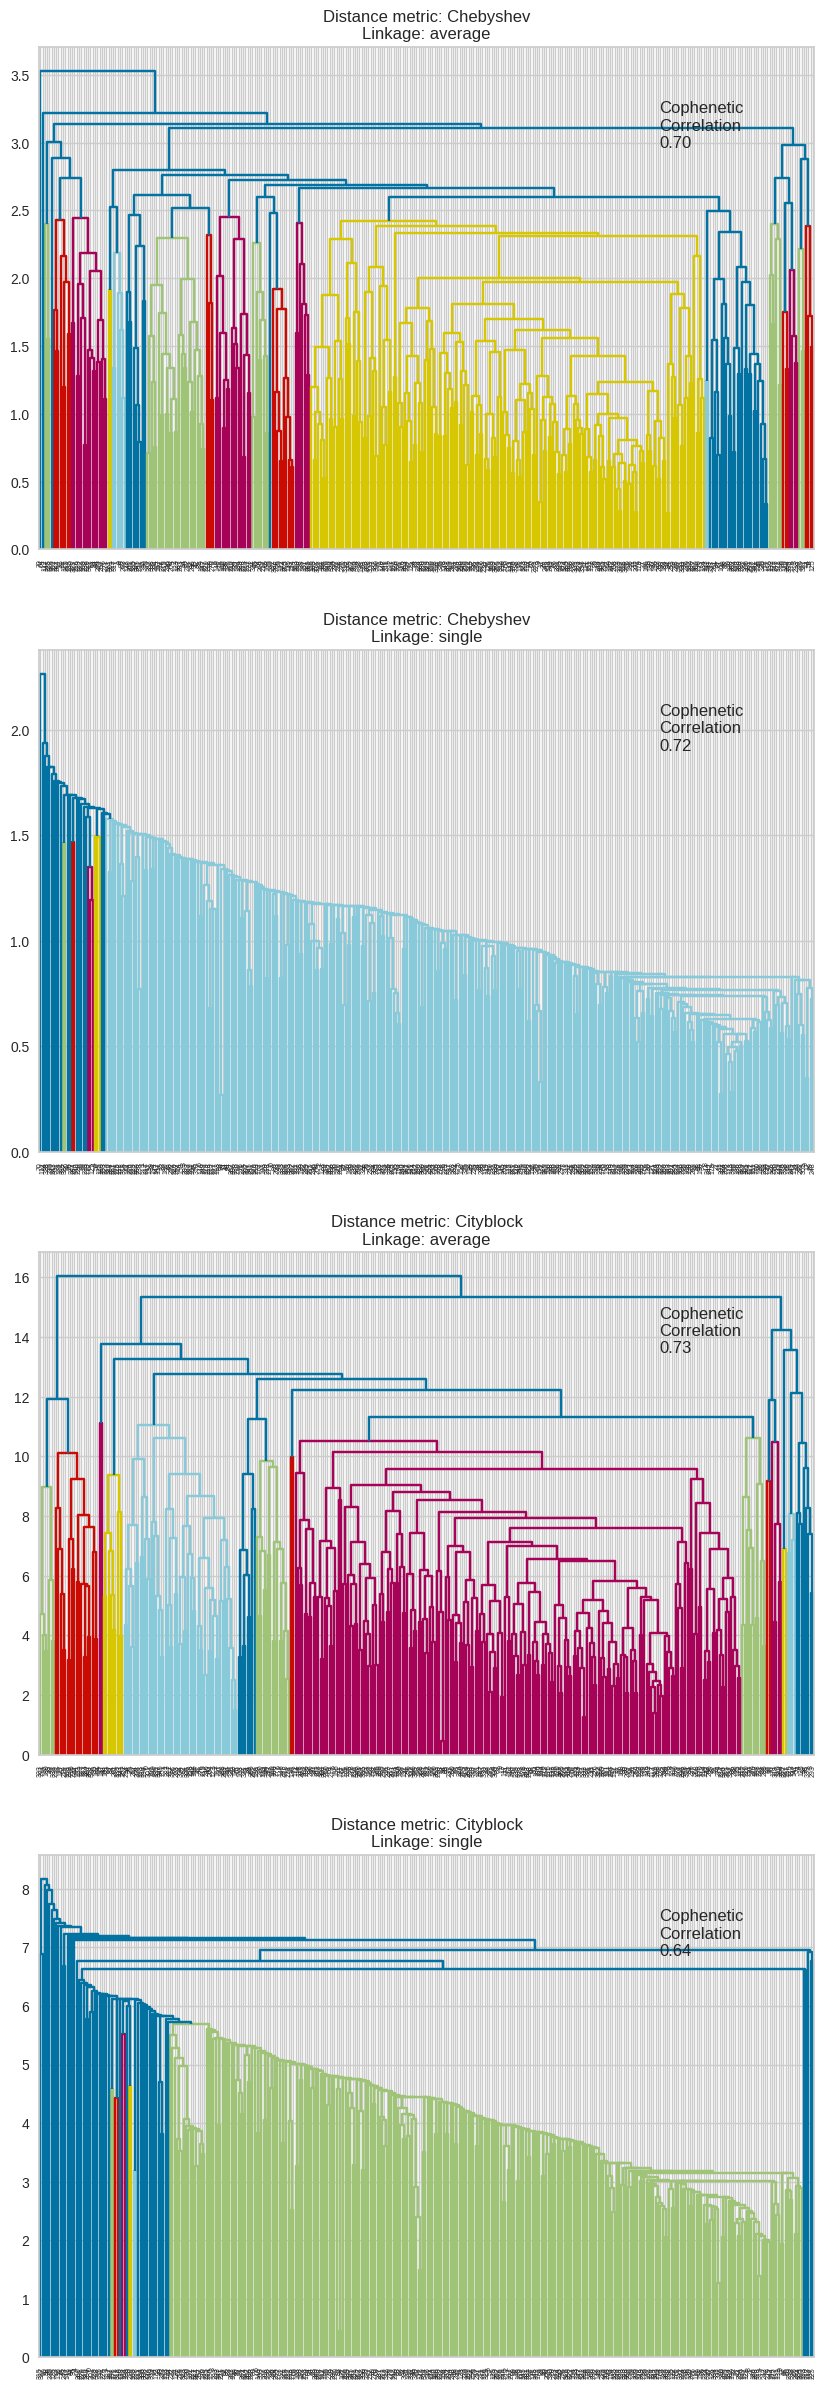

In [ ]:
# list of distance metrics
distance_metrics = ["chebyshev", "cityblock"]

# list of linkage methods
linkage_methods = ["average", "single"]

# to create a subplot image
fig, axs = plt.subplots(
    len(distance_metrics) + len(distance_metrics), 1, figsize=(10, 30)
)

i = 0
for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(hier_df, metric=dm, method=lm)

        dendrogram(Z, ax=axs[i])
        axs[i].set_title("Distance metric: {}\nLinkage: {}".format(dm.capitalize(), lm))

        coph_corr, coph_dist = cophenet(Z, pdist(hier_df))
        axs[i].annotate(
            f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
            (0.80, 0.80),
            xycoords="axes fraction",
        )
        i += 1

**Observations**

- Out of all the dendrograms we saw, it is clear that the dendrogram Average Linkage  - Euclidean measure had 5 distinct clusters

### Creating Final Model

In [ ]:
HCmodel = AgglomerativeClustering(n_clusters=5, affinity="euclidean", linkage="average")
HCmodel.fit(hier_df)

AgglomerativeClustering(affinity='euclidean', linkage='average', n_clusters=5)

In [ ]:
# adding hierarchical cluster labels to the original and scaled dataframes

hier_df["HC_Clusters"] = HCmodel.labels_
data["HC_Clusters"] = HCmodel.labels_

### Cluster Profiling

In [ ]:
cluster_profile = data.groupby("HC_Clusters").mean()

In [ ]:
cluster_profile["count_in_each_segments"] = (
    data.groupby("HC_Clusters")["Security"].count().values
)

In [ ]:
# let's display cluster profiles
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

Lets also check with other values, from the dendogram we can see ward linkage had 4 distinct clusters.

In [ ]:
## code to define the hierarchical clustering model
HCmodel = AgglomerativeClustering(n_clusters=4, affinity="euclidean", linkage="ward")
HCmodel.fit(hier_df)

AgglomerativeClustering(affinity='euclidean', n_clusters=4)

In [ ]:
# adding hierarchical cluster labels to the original and scaled dataframes

hier_df["HC_Clusters"] = HCmodel.labels_
data["HC_Clusters"] = HCmodel.labels_

In [ ]:
cluster_profile = data.groupby("HC_Clusters").mean()
cluster_profile["count_in_each_segments"] = (
    data.groupby("HC_Clusters")["Security"].count().values
)
# let's display cluster profiles
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

Clusters are distinct with good variability using ward linkage. Hence using **Ward as the final model**

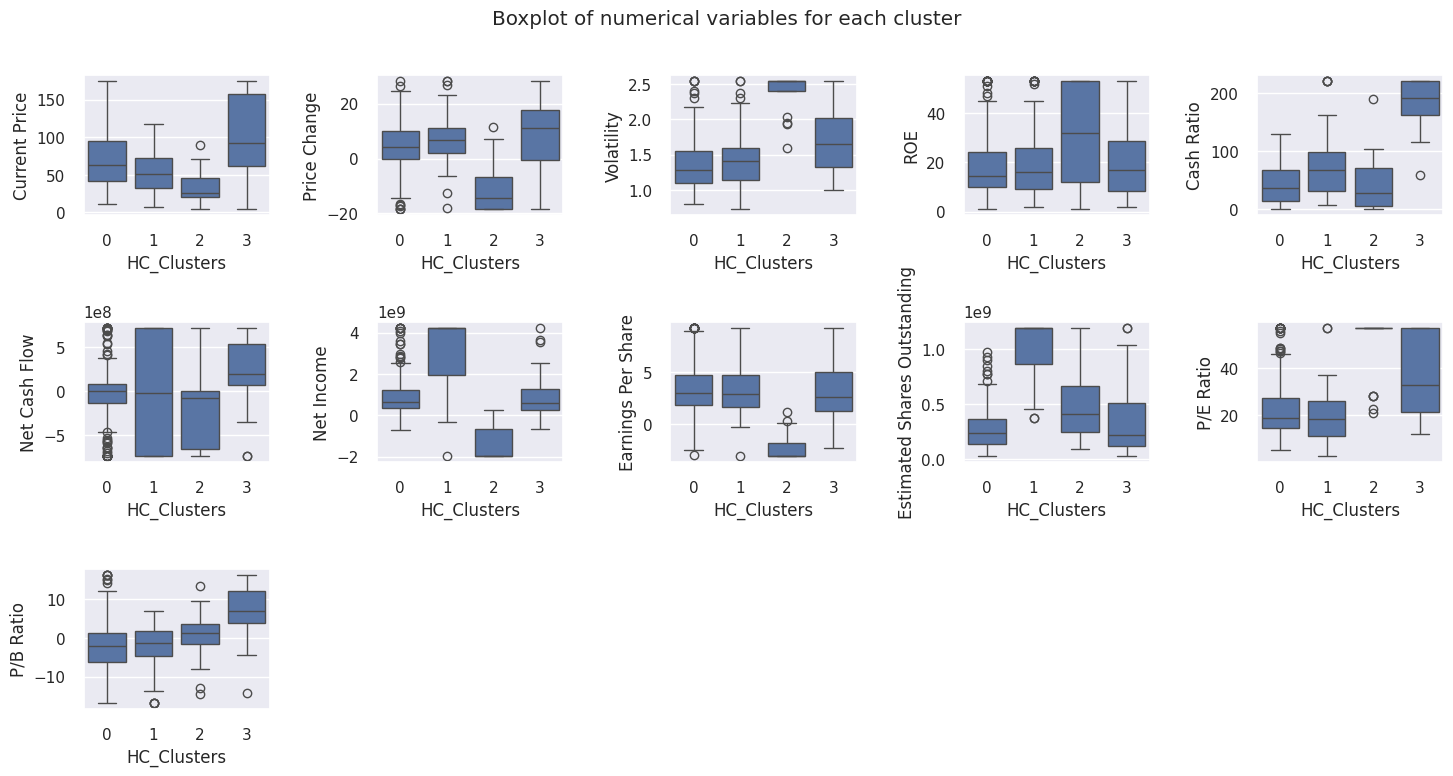

In [ ]:
plt.figure(figsize=(15, 10))
plt.suptitle("Boxplot of numerical variables for each cluster")

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 5, i + 1)
    sns.boxplot(data=data, x="HC_Clusters", y=variable)

plt.tight_layout(pad=2.0)

In [ ]:
# let's see names of companies in each cluster
for cl in data["HC_Clusters"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(data[data["HC_Clusters"] == cl]["Security"].unique())
    print()

In cluster 1, the following companies are present:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'American International Group, Inc.' 'Applied Materials Inc'
 'Arconic Inc' 'Activision Blizzard' 'American Express Co'
 'Bank of America Corp' 'The Bank of New York Mellon Corp.'
 'Bristol-Myers Squibb' 'Boston Scientific' 'Citigroup Inc.'
 'Capital One Financial' 'CSX Corp.' 'CVS Health' 'Chevron Corp.'
 'Delta Air Lines' 'Du Pont (E.I.)' 'Danaher Corp.'
 'The Walt Disney Company' 'Duke Energy' 'eBay Inc.' 'Eaton Corporation'
 'Ford Motor' 'Gilead Sciences' 'Corning Inc.' 'General Motors'
 'Hewlett Packard Enterprise' 'HP Inc.' 'Host Hotels & Resorts'
 'Intel Corp.' 'JPMorgan Chase & Co.' 'Coca Cola Company'
 'Lilly (Eli) & Co.' 'Mastercard Inc.' "McDonald's Corp."
 'Mondelez International' 'MetLife Inc.' 'Monster Beverage'
 'Altria Group Inc' 'Merck & Co.' 'Mylan N.V.' 'Navient' 'PepsiCo Inc.'
 'Pfizer Inc.' 'Philip Morris International' 'Prudential Financial'
 'PayPal' 'Cha

In [ ]:
data.groupby(["HC_Clusters", "GICS Sector"])['Security'].count()

HC_Clusters  GICS Sector                
0            Consumer Discretionary         31
             Consumer Staples               11
             Energy                          5
             Financials                     35
             Health Care                    20
             Industrials                    42
             Information Technology         10
             Materials                      16
             Real Estate                    25
             Telecommunications Services     2
             Utilities                      23
1            Consumer Discretionary          4
             Consumer Staples                7
             Energy                          2
             Financials                     13
             Health Care                    10
             Industrials                    10
             Information Technology         12
             Materials                       1
             Real Estate                     1
             Teleco

### Insights

The cluster profiles for size 4 in the Ward Linkage (Euclidean) method:

**Cluster 0 (217 stocks):**
- Characteristics:
  - Moderate volatility (1.42)
  - Average P/E ratio (24.02)
  - Negative Price Change (-2.70%)
  - Represents 217 companies, spanning multiple sectors.
  - Exhibits moderate volatility (1.42), average P/E ratio (24.02), and a negative price change (-2.70%).
- Interpretation: This cluster includes stocks with moderate volatility, average P/E ratios, and a negative price change.

**Cluster 1 (34 stocks):**
- Characteristics:
  - Higher volatility (1.68)
  - Higher P/E ratio (35.77)
  - Positive Price Change (7.45%)
  - Comprises 34 companies.
  - Demonstrates higher volatility (1.68), higher P/E ratio (35.77), and a positive price change (7.45%).
- Interpretation: This cluster contains stocks with higher volatility, higher P/E ratios, and positive price changes, suggesting potential growth stocks.

**Cluster 2 (66 stocks):**
- Characteristics:
  - Low volatility (1.27)
  - Low P/E ratio (16.85)
  - Negative Price Change (-1.50%)
  - Encompasses 66 companies.
  - Displays low volatility (1.27), low P/E ratio (16.85), and a negative price change (-1.50%).
- Interpretation: This cluster consists of stocks with low volatility, lower P/E ratios, and a negative price change, possibly indicating stability or value stocks.

**Cluster 3 (23 stocks):**
- Characteristics:
  - High volatility (2.39)
  - High P/E ratio (50.10)
  - Positive Price Change (0.69%)
  - Includes 23 companies.
  - Features high volatility (2.39), high P/E ratio (50.10), and a small positive price change (0.69%).
- Interpretation: This cluster includes stocks with high volatility, high P/E ratios, and a small positive price change, which might be considered high-risk, high-reward stocks.


## K-means vs Hierarchical Clustering

Both k-means and hierarchical clustering produced similar results in terms of the number of clusters and the composition of sectors within each cluster. Here's a summary:

1. **Number of Clusters:**
   - Both k-means and hierarchical clustering identified 4 clusters as the appropriate number.

2. **Distinct Clusters:**
   - Both algorithms produced very similar results, with k-means being slightly more distinct in its 4 clusters compared to hierarchical clustering.

3. **Observations in Similar Clusters:**
   - Both algorithms have similar observations and cluster sizes. There is a common pattern in the distribution of sectors across clusters, with some clusters being more sizable and others having smaller but comparable sizes.

4. **Execution Time:**
   - The Sklearn implementations of both algorithms have very small and similar execution times. However, you mentioned that hierarchical clustering takes slightly longer to run dendrograms.

Given these observations, it seems that both k-means and hierarchical clustering are providing consistent and comparable results for the dataset.
